## Hacker Rank Developer Survey

* [Wiki](https://en.wikipedia.org/wiki/HackerRank)
* [Hacker Rank](https://www.hackerrank.com)

HackerRank is a technology company that focuses on competitive programming challenges for both consumers and businesses, where developers compete by trying to program according to provided specifications. HackerRank's programming challenges can be solved in a variety of programming languages (including Java, C++, PHP, Python, SQL, JavaScript) and span multiple computer science domains.

**HackerRank was founded as InterviewStreet by two NIT (National Institue of Technology) Trichy *INDIA* alumni Vivek Ravisankar and Hari Karunanidhi.** Wow!


<center><img src='https://www.nerdynaut.com/wp-content/uploads/2015/11/3717138_orig.jpg'></center>

***
**Steps**
1. [Explore data set](#Explore-data-set)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [Distribution of response (map view)](#Distribution-of-response)
4. [Gender based QnA](#Gender-based-QnA)
5. [Employe Hiring parameters](#Employe-Hiring-parameters)
6. [Hacker Rank feed back](#Hacker-Rank-feed-back)
7. [KMeans Clustering](#KMeans-Clustering)
8. [Summary](#Summary)

What you can gain?
1. You will get know about groupby,pivot and seaborn heatmap for pivot table, it is better to make heatmap instead of barh graph in pandas
2. You will get know about pandas style on data frame, this is look similar heatmap .The multiple heatmap can be drawn adjasent to each other but not pandas style background_gradient.
3. Women participation haker rank survey
4. Diffirent hiring process,resume screenig,employe expectation 
5. Hacker Rank review

### Load Packages

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(True)
plt.style.use('ggplot')
pd.options.display.max_rows =300
plt.rc('ytick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.rc('axes',labelsize=12)

### Read data set

In [33]:
path ='file/'
#path = '../input/'

hacker_numeric = pd.read_csv(path+'HackerRank-Developer-Survey-2018-Numeric.csv',na_values='#NULL!',low_memory=False)
#hacker_map = pd.read_csv('file/HackerRank-Developer-Survey-2018-Numeric-Mapping.csv')
hacker_qna = pd.read_csv(path+'HackerRank-Developer-Survey-2018-Codebook.csv')
df = pd.read_csv(path+ 'HackerRank-Developer-Survey-2018-Values.csv',na_values='#NULL!',low_memory=False)
print('Number of rows and columns in Hacker value data set',df.shape)

Number of rows and columns in Hacker value data set (25093, 251)


* While reading data missing na value is set to '#NULL!'.

### Explore data set

In [34]:
hacker_qna = hacker_qna.set_index('Data Field')
hacker_qna.head()

Survey Question  \
Data Field                                           
RespondentID                                   NaN   
StartDate                                      NaN   
EndDate                                        NaN   
CountryNumeric                                 NaN   
q1AgeBeginCoding  At what age did you start coding   

                                                Notes  
Data Field                                             
RespondentID                            Respondent ID  
StartDate         When did they start (date and time)  
EndDate             When did they end (date and time)  
CountryNumeric           see Country-Code-Mapping.csv  
q1AgeBeginCoding                                  NaN

In [35]:
df.head()

RespondentID       StartDate         EndDate CountryNumeric  \
0  6.464454e+09  10/19/17 11:51  10/20/17 12:05    South Korea   
1  6.478032e+09   10/26/17 6:18   10/26/17 7:49        Ukraine   
2  6.464393e+09  10/19/17 10:44  10/19/17 10:56         Latvia   
3  6.481630e+09   10/27/17 1:51   10/27/17 2:05          China   
4  6.488385e+09  10/31/17 11:46  10/31/17 11:59            NaN   

    q1AgeBeginCoding              q2Age q3Gender  \
0  16 - 20 years old  18 - 24 years old   Female   
1  16 - 20 years old  25 - 34 years old     Male   
2  11 - 15 years old  12 - 18 years old   Female   
3  11 - 15 years old  12 - 18 years old     Male   
4  16 - 20 years old  25 - 34 years old   Female   

                           q4Education q0004_other  \
0                         Some college         NaN   
1  Post graduate degree (Masters, PhD)         NaN   
2                         Some college         NaN   
3                     College graduate         NaN   
4                     College graduate         NaN   

                                       q5DegreeFocus    ...     \
0                                   Computer Science    ...      
1  Other STEM (science, technology, engineering, ...    ...      
2  Other STEM (science, technology, engineering, ...    ...      
3                                   Computer Science    ...      
4                                                NaN    ...      

        q30LearnCodeOther                         q0030_other   q31Level3  \
0  Other (please specify)                            datacamp  num%2 == 0   
1                     NaN                                 NaN  num%2 == 0   
2                     NaN                                 NaN  num%2 == 0   
3                     NaN                                 NaN  num%2 == 0   
4  Other (please specify)  Blogs/articles by industry leaders  num%2 == 0   

  q32RecommendHackerRank q0032_other q33HackerRankChallforJob q34PositiveExp  \
0                    Yes         NaN                       No            NaN   
1                    Yes         NaN                       No            NaN   
2                    Yes         NaN                       No            NaN   
3                    Yes         NaN                       No            NaN   
4                    Yes         NaN                       No            NaN   

  q34IdealLengHackerRankTest q0035_other q36Level4  
0                        NaN         NaN     Queue  
1                        NaN         NaN     Queue  
2                        NaN         NaN     Queue  
3                        NaN         NaN   Hashmap  
4                        NaN         NaN   Hashmap  

[5 rows x 251 columns]

In [36]:
def basic_details(df):
    print('Number of rows {} and columns {}'.format(df.shape[0],df.shape[1]))
    k = pd.DataFrame()
    k['dtype'] = df.dtypes
    k['Number of unique value'] = df.nunique()
    k['Missing_value'] = df.isnull().sum()
    k['% missing_value'] = df.isnull().sum()/df.shape[0]
    return k
basic_details(df).T

Number of rows 25093 and columns 251


RespondentID    StartDate      EndDate CountryNumeric  \
dtype                       float64       object       object         object   
Number of unique value        25090         6885         6948            139   
Missing_value                     3            3            3           2929   
% missing_value         0.000119555  0.000119555  0.000119555       0.116726   

                       q1AgeBeginCoding       q2Age    q3Gender q4Education  \
dtype                            object      object      object      object   
Number of unique value                9           9           3           7   
Missing_value                        33          44          72         308   
% missing_value              0.00131511  0.00175348  0.00286933   0.0122743   

                       q0004_other q5DegreeFocus     ...      \
dtype                       object        object     ...       
Number of unique value         354             2     ...       
Missing_value                24633          1324     ...       
% missing_value           0.981668     0.0527637     ...       

                       q30LearnCodeOther q0030_other    q31Level3  \
dtype                             object      object       object   
Number of unique value                 1         825            4   
Missing_value                      23869       23870            3   
% missing_value                 0.951221    0.951261  0.000119555   

                       q32RecommendHackerRank q0032_other  \
dtype                                  object      object   
Number of unique value                      2         334   
Missing_value                             496       24711   
% missing_value                     0.0197665    0.984777   

                       q33HackerRankChallforJob q34PositiveExp  \
dtype                                    object        float64   
Number of unique value                        2              6   
Missing_value                               189          16076   
% missing_value                      0.00753198       0.640657   

                       q34IdealLengHackerRankTest q0035_other   q36Level4  
dtype                                      object      object      object  
Number of unique value                          4         200           3  
Missing_value                               15168       24884         166  
% missing_value                          0.604471    0.991671  0.00661539  

[4 rows x 251 columns]

In [37]:
df.tail()

RespondentID      StartDate        EndDate CountryNumeric  \
25088  6.489519e+09  11/1/17 12:07  11/1/17 12:25       Malaysia   
25089  6.489540e+09  11/1/17 12:30  11/1/17 12:39            NaN   
25090           NaN            NaN            NaN            NaN   
25091           NaN            NaN            NaN            NaN   
25092           NaN            NaN            NaN            NaN   

        q1AgeBeginCoding              q2Age q3Gender       q4Education  \
25088  16 - 20 years old  18 - 24 years old     Male               NaN   
25089  21 - 25 years old  18 - 24 years old     Male  College graduate   
25090                NaN                NaN      NaN               NaN   
25091                NaN                NaN      NaN               NaN   
25092                NaN                NaN      NaN               NaN   

             q0004_other     q5DegreeFocus    ...    q30LearnCodeOther  \
25088  Doing Engineering  Computer Science    ...                  NaN   
25089                NaN  Computer Science    ...                  NaN   
25090                NaN               NaN    ...                  NaN   
25091                NaN               NaN    ...                  NaN   
25092                NaN               NaN    ...                  NaN   

      q0030_other   q31Level3 q32RecommendHackerRank q0032_other  \
25088         NaN  num%2 == 0                    Yes         NaN   
25089         NaN  num%2 == 0                    Yes         NaN   
25090         NaN         NaN                    NaN         NaN   
25091         NaN         NaN                    NaN         NaN   
25092         NaN         NaN                    NaN         NaN   

      q33HackerRankChallforJob q34PositiveExp q34IdealLengHackerRankTest  \
25088                       No            NaN                        NaN   
25089                       No            NaN                        NaN   
25090                      NaN            NaN                        NaN   
25091                      NaN            NaN                        NaN   
25092                      NaN            NaN                        NaN   

      q0035_other q36Level4  
25088         NaN     Queue  
25089         NaN       Set  
25090         NaN       NaN  
25091         NaN       NaN  
25092         NaN       NaN  

[5 rows x 251 columns]

The are entire last 3 rows contain missing value, there may some bug.

There are 139 countries lisited in data set.

## Exploratory Data Analysis 
### The response time
Let's look at the day on which got most response.

In [38]:
# Conver to date time
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])

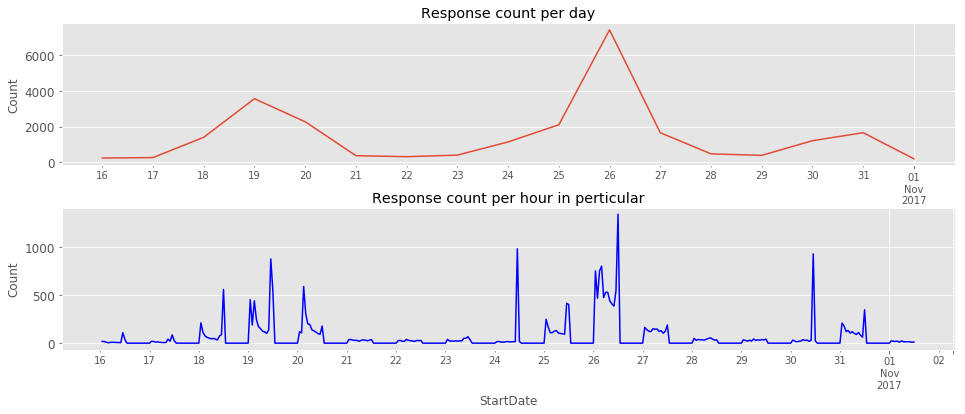

In [39]:
f,ax = plt.subplots(2,1, figsize=(16,6))
df.set_index('StartDate').resample('D')['q2Age'].count().plot(ax=ax[0])
ax[0].set_title('Response count per day')
ax[0].set_ylabel('Count')
df.set_index('StartDate').resample('H')['q2Age'].count().plot(ax=ax[1],color='b')
ax[1].set_title('Response count per hour in perticular')
ax[1].set_ylabel('Count')
plt.subplots_adjust(hspace=0.3)

* The survey conducted from 16 Octobar to 2 November
* The maximum response obtainde on 26th October

### Distribution of survey by Hour

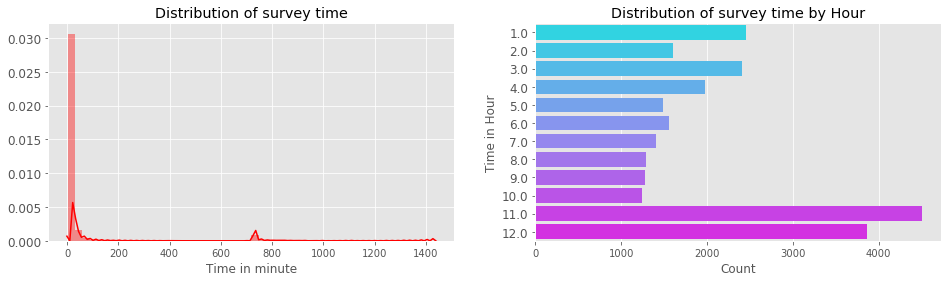

In [40]:
f,ax = plt.subplots(1,2,figsize=(16,4))
duration = pd.to_datetime(df['EndDate'] - df['StartDate']).dt.hour * 60 +\
            pd.to_datetime(df['EndDate'] - df['StartDate']).dt.minute

sns.distplot(duration.dropna().values, color = 'r',ax=ax[0],)
ax[0].set_title('Distribution of survey time')
ax[0].set_xlabel('Time in minute')

poo = df['StartDate'].dt.hour
sns.countplot(y = poo.values, palette='cool',ax=ax[1])
ax[1].set_title('Distribution of survey time by Hour')
ax[1].set_ylabel('Time in Hour')
ax[1].set_xlabel('Count');

* The maximum time time taken to answer the quenstion ir 1400 minute, the mean time taken to is 10 minute.
* The survey response maximum at 11 O'clock

### Distribution of response

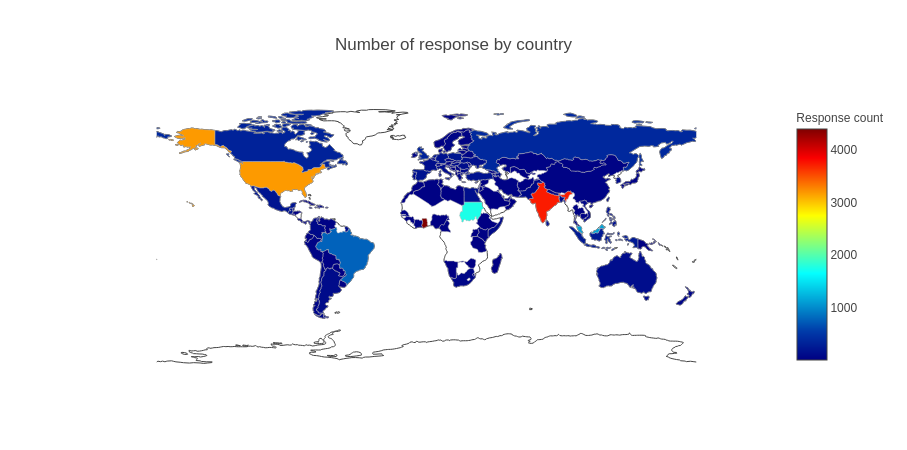

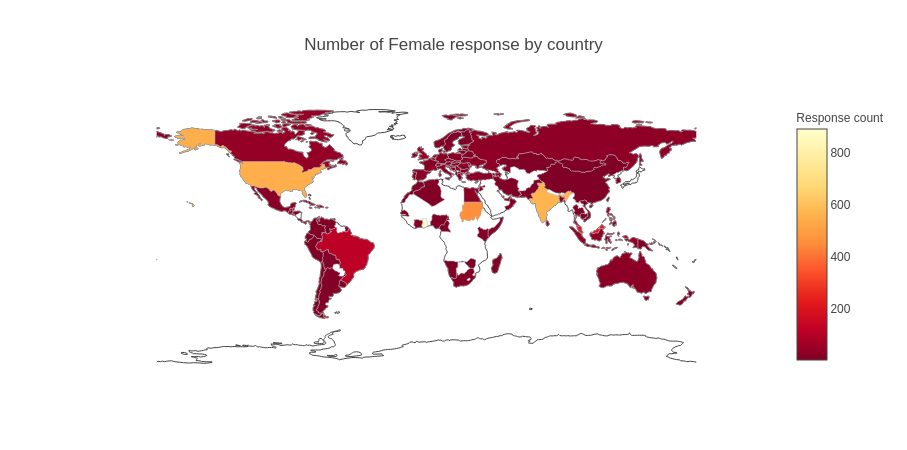

In [41]:
# Count by country

poo = df['CountryNumeric'].value_counts()

# plotly 
data = [dict(
    type ='choropleth',
    locations = poo.index,
    locationmode ='country names',
    z = poo.values,
    text = ('Count'+'<br>'),
    colorscale='Jet',
    reversescale=False,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
    
    colorbar = dict(title ='Response count')
    )]
layout = dict(title = 'Number of response by country',
             geo = dict( showframe= False,
                       showcoastlines =True,
                       projection = dict(type = 'Mercator')))
fig = dict(data=data, layout=layout)
py.iplot(fig)

# count female bt country

poo = df[df['q3Gender'] == 'Female']['CountryNumeric'].value_counts()

# plotly 
data = [dict(
    type ='choropleth',
    locations = poo.index,
    locationmode ='country names',
    z = poo.values,
    text = 'Female count',
    colorscale='YlOrRd',
    reversescale=False,
    marker=dict(line=dict(color='rgb(180,180,180)', width=0.5)),
    colorbar = dict(title ='Response count')
    )]
layout = dict(title = 'Number of Female response by country',
             geo = dict( showframe= False,
                       showcoastlines =True,
                       projection = dict(type = 'Mercator')))
fig = dict(data=data, layout=layout)
py.iplot(fig,filename='map')


* The top response give by African country Ghana,India,US
* The top female response is in Ghana followed India

## Gender based QnA

### Q3: Distribution of Gender
Let's see what are diffirent response obtained

Q?: What gender do you identify with?


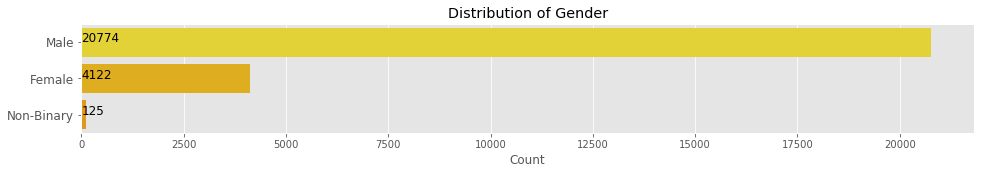

In [42]:
print('Q?:',hacker_qna.loc['q3Gender']['Survey Question'])
plt.figure(figsize=(16,2))
poo = df['q3Gender'].value_counts()
sns.barplot(poo.values,poo.index, palette='Wistia')
for i, v in enumerate(poo.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.title('Distribution of Gender')
plt.xlabel('Count');

* There are 20k male, 4k feamle are responded to hacker rank survey.

### Q1: What age you started first coding?

Q?: At what age did you start coding


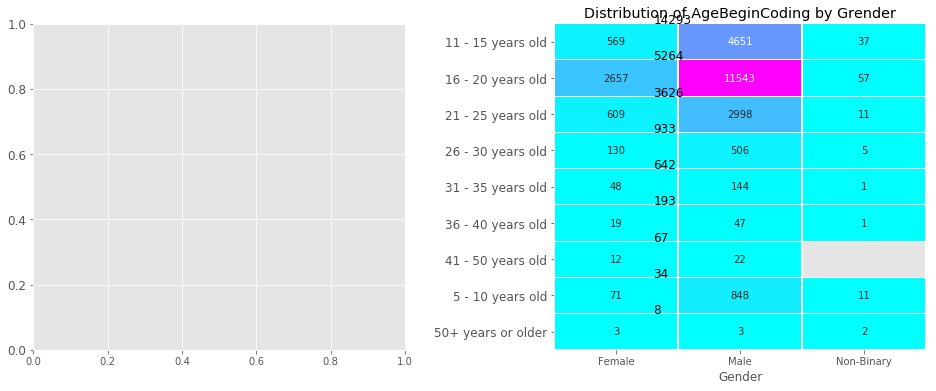

In [123]:
print('Q?:',hacker_qna.loc['q1AgeBeginCoding']['Survey Question'])

f,ax = plt.subplots(1,2, figsize=(16,6))
st_age = df['q1AgeBeginCoding'].value_counts()
sns.barplot(st_age.values, st_age.index, palette='Wistia',ax=ax[0],estimator = lambda x: sum(x==0)*100.0/len(x))
ax[0].set_title('Distribution of Begin coding')
ax[0].set_xlabel('Count')
for i, v in enumerate(st_age.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)


foo = df.groupby(['q1AgeBeginCoding','q3Gender'])['q3Gender'].count().reset_index(name='count')
foo = foo.pivot(columns='q3Gender', index='q1AgeBeginCoding', values ='count')
#foo.plot(kind='barh',ax=ax[1],colormap='cool')
sns.heatmap(foo,annot=True, fmt='.0f', linewidths=.01, cmap='cool', cbar=False, ax=ax[1])
ax[1].set_title('Distribution of AgeBeginCoding by Grender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('')
#plt.savefig('age.png')
plt.subplots_adjust(wspace=0.4);

* The most of people stared coding in age 16-20 years followed by 11-15 year.

### Q2: Distribution of Current Age

Q?: How old are you now?


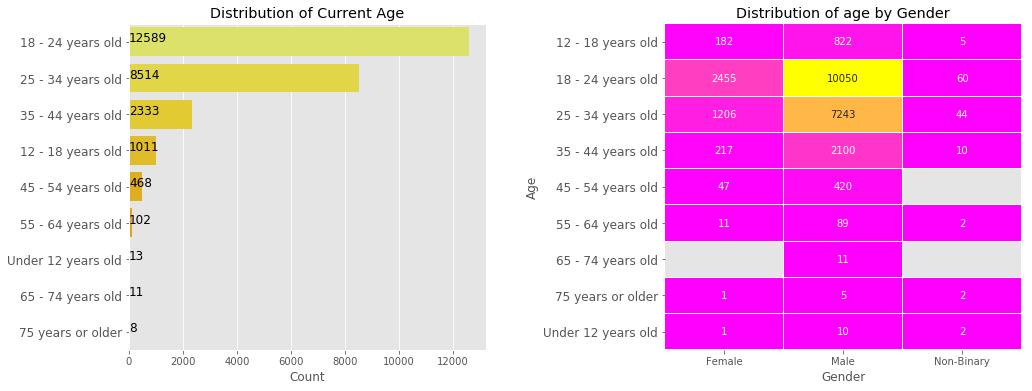

In [44]:
print('Q?:',hacker_qna.loc['q2Age']['Survey Question'])

f,ax = plt.subplots(1,2,figsize=(16,6))
age = df['q2Age'].value_counts()
sns.barplot(age.values, age.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Current Age')
ax[0].set_xlabel('Count')
for i, v in enumerate(age.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)

poo = df.groupby(['q2Age','q3Gender'])['q3Gender'].count().reset_index(name='count')
poo = poo.pivot(columns='q3Gender',index='q2Age',values='count')
#poo.plot(kind='barh',ax=ax[0],colormap='tab10')
sns.heatmap(poo,annot=True, fmt='.0f', linewidths=.01, cmap='spring', cbar=False, ax=ax[1])
ax[1].set_title('Distribution of age by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Age')
plt.subplots_adjust(wspace=0.5);

* The current age of participents is 18-24 years followed by 25-34 years is top in the table

### Q4: Distribution of Education

Q?: What is the highest level of education you have (or plan to obtain)?


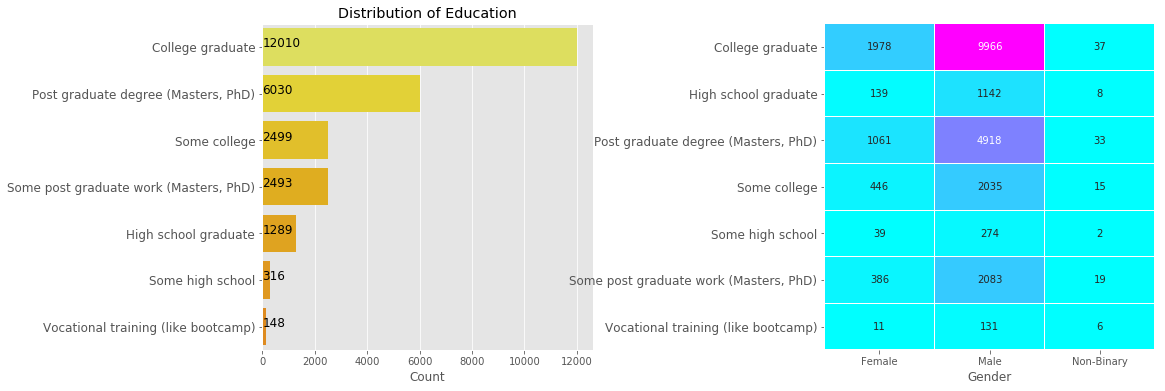

In [45]:
print('Q?:',hacker_qna.loc['q4Education']['Survey Question'])

f,ax = plt.subplots(1,2, figsize=(16,6))
st_age = df['q4Education'].value_counts()
sns.barplot(st_age.values, st_age.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Education')
ax[0].set_xlabel('Count')
for i, v in enumerate(st_age.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)

poo = df.groupby(['q4Education','q3Gender'])['q3Gender'].count().reset_index(name='count')
poo = poo.pivot(columns='q3Gender',index='q4Education',values='count')
#poo.plot(kind='barh',ax=ax[0],colormap='tab10')
sns.heatmap(poo, annot=True, fmt='.0f',cmap='cool',linewidths=0.01, cbar=False, ax=ax[1],)
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0.7)

* The highest level of education is College graduate followed by Master, phd.
* The people don't consider bootcamp as main learning platform 

### Wordcloud (other education level) 
I have used word cloud for other type as it is text data, it will remove stop words in the data set,<br>
other than above type education mentioned

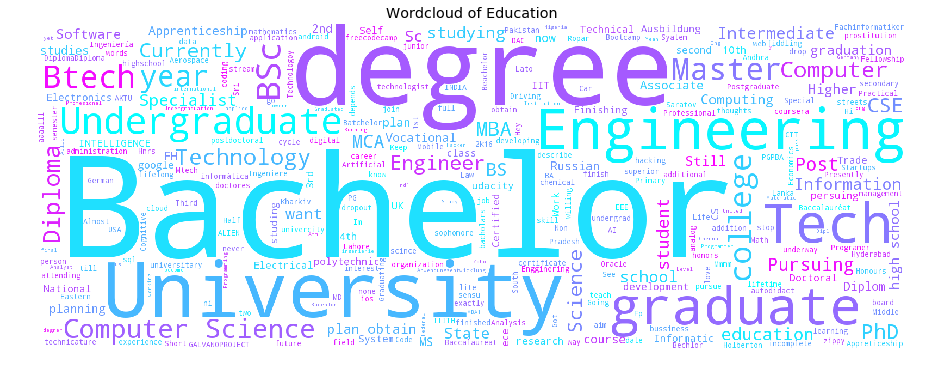

In [46]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='cool',background_color='White'\
              ).generate(' '.join(df['q0004_other'].dropna().astype(str)))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.savefig('cloud.png')
plt.title('Wordcloud of Education');

* The Bachelor degree, under graduate, Engineering, University ect are top education level mentioned

### Q5: Distribution of Degree Focus

Q?: What is the focus area of your degree?


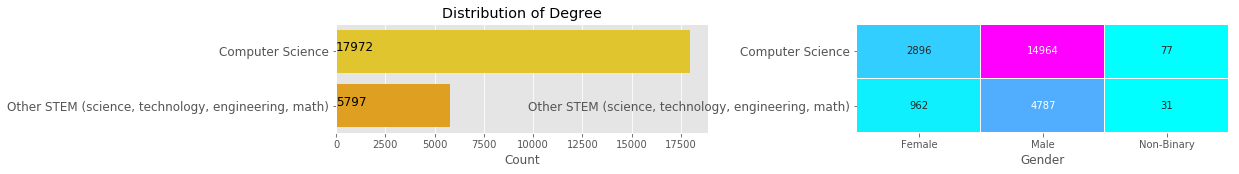

In [47]:
print('Q?:',hacker_qna.loc['q5DegreeFocus']['Survey Question'])

f,ax = plt.subplots(1,2, figsize=(16,2))
deg = df['q5DegreeFocus'].value_counts()
sns.barplot(deg.values, deg.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Degree')
ax[0].set_xlabel('Count')
for i, v in enumerate(deg.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)

foo = df.groupby(['q5DegreeFocus','q3Gender'])['q3Gender'].count().reset_index(name='count')
foo = foo.pivot(columns='q3Gender', index='q5DegreeFocus', values ='count')
#foo.plot(kind='barh',ax=ax[1],colormap='cool')
sns.heatmap(foo, annot=True, linewidths=0.1, fmt='.0f',cmap='cool', cbar=False, ax=ax[1])
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0.4);

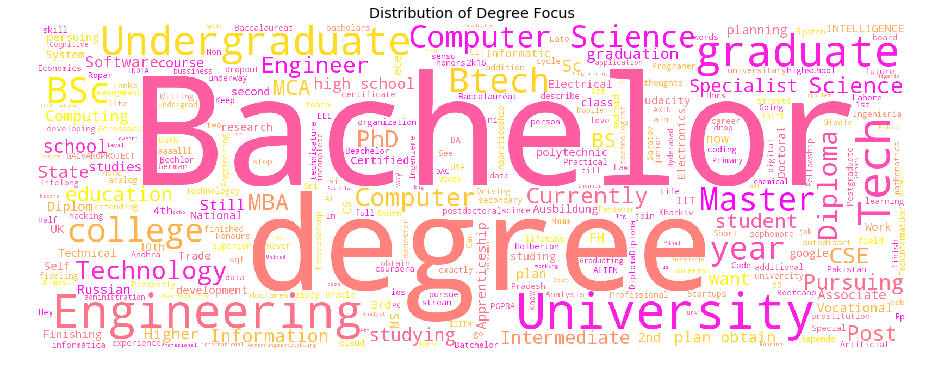

In [48]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=2000,stopwords=STOPWORDS,colormap='spring',background_color='White'\
              ).generate(' '.join(df['q0004_other'].dropna().astype(str)))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Distribution of Degree Focus')

* The Bachelor degree, under graduate, Engineering, University ect are top education level mentioned

### Q6: How did you learn how to code?

In [49]:
columns = df.columns[df.columns.str.startswith('q6')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

code = pd.DataFrame() 
for c in columns:
    agg = df.groupby([c,'q3Gender'])['q3Gender'].count().reset_index(name='count')
    agg = agg.pivot(columns='q3Gender',index=c, values='count')
    code = pd.concat([code,agg])
code.style.background_gradient(cmap='cool')

Q?: How did you learn how to code?


* The most popular place where learnt coding is University or school and Self taught
* The accelerate coding or bootcamp is not popular choice for learn to code
* Female prefer school or university than self taught but male prefer other way more

### Word cloud

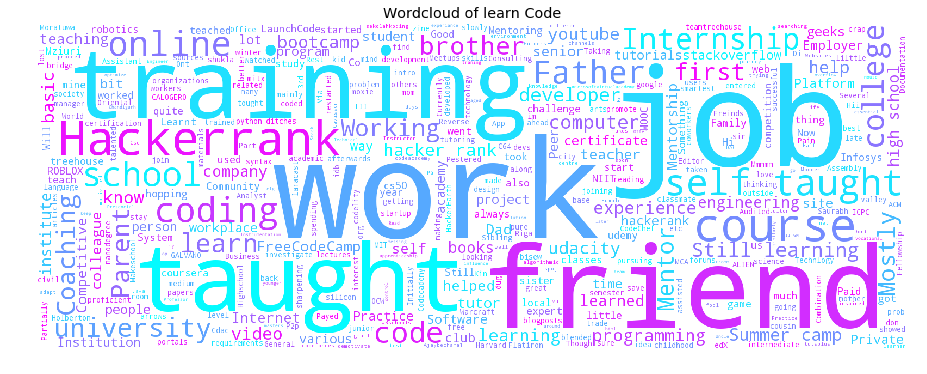

In [50]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='cool',background_color='White'\
              ).generate(' '.join(df['q0006_other'].dropna().astype(str)))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Wordcloud of learn Code')

* The other option people learnt coding is from Work, Job, Training,
* We find that few peple learnt coding from Hacker Rank

### Q7: Level 1 to Level2 Unlocking Question

Q?: Success! You completed Level 1 of 4.  To unlock Level 2, solve this quick challenge:What language does the following code snippet belong toint ptr = 1;


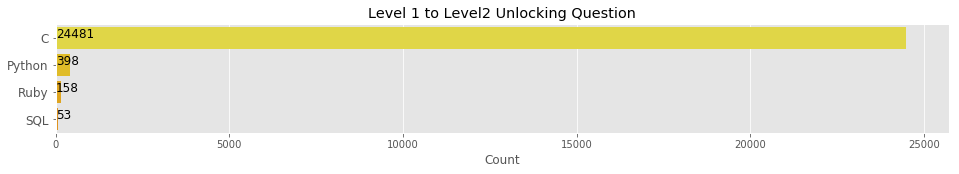

In [51]:
print('Q?:',hacker_qna.loc['q7Level1']['Survey Question'])

f,ax = plt.subplots( figsize=(16,2))
pro = df['q7Level1'].value_counts()
sns.barplot(pro.values, pro.index, palette='Wistia',ax=ax)
ax.set_xlabel('Count')
ax.set_title('Level 1 to Level2 Unlocking Question')
for i, v in enumerate(pro.values):
    ax.text(0.8,i,v,color='k',fontsize=12)

### Q8: Distribution of Employment Level

Q?: Which of the following best matches your employment level?


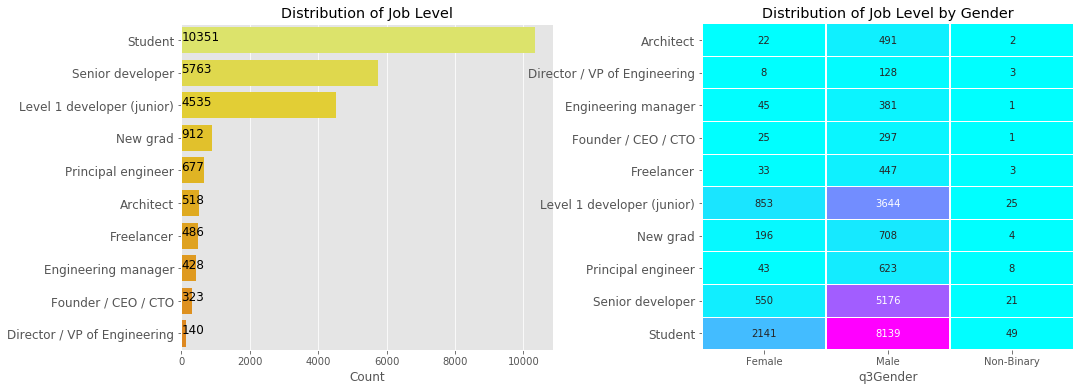

In [52]:
print('Q?:',hacker_qna.loc['q8JobLevel']['Survey Question'])

f,ax = plt.subplots(1,2,figsize=(16,6))
job = df['q8JobLevel'].value_counts()
sns.barplot(job.values, job.index, palette='Wistia',ax=ax[0])
ax[0].set_xlabel('Count')
ax[0].set_title('Distribution of Job Level')
for i, v in enumerate(job.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)
    
agg = df.groupby(['q8JobLevel','q3Gender'])['q3Gender'].count().reset_index(name='count')
agg = agg.pivot(columns='q3Gender',index='q8JobLevel',values='count')
#agg.plot(kind='barh',ax=ax[1],colormap='cool')
sns.heatmap(agg,cmap='cool',annot=True,linewidths=0.01,fmt='.0f',cbar=False, ax=ax[1])
ax[1].set_title('Distribution of Job Level by Gender')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.4);

We find
* Female Level1 developer is more than senior develpoer,but for male it other way, may be promotion for female is limit.

### Word cloud ( job level  other than above)

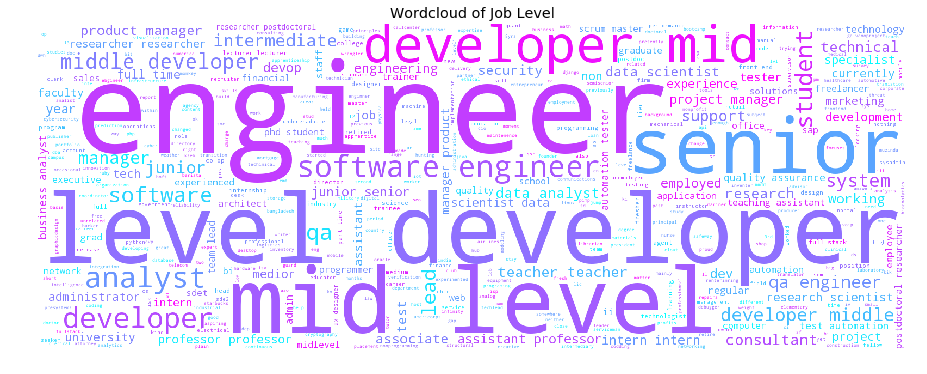

In [53]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='cool',background_color='White'\
              ).generate(' '.join(df['q0008_other'].dropna().str.lower()))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Wordcloud of Job Level')

* The engineer is most popular choice of employment level discription,
* We can also see Data scientist, Data Analyst,Business analyst is employment level discription in wordcloud

### Q9 Distribution of Current role

Q?: Which one of these best describes your current role?


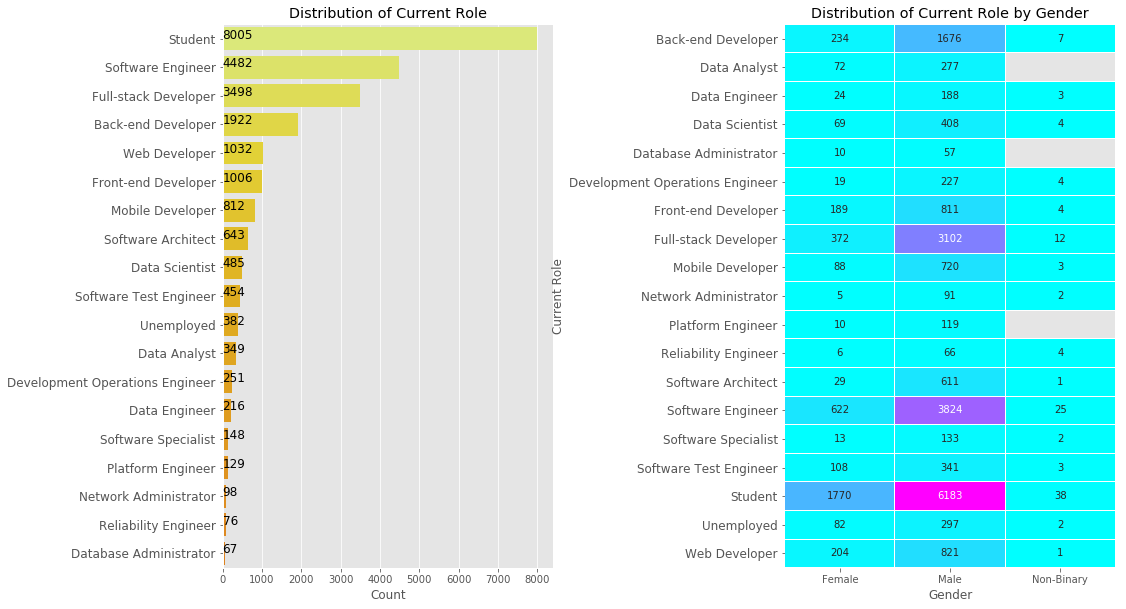

In [54]:
print('Q?:',hacker_qna.loc['q9CurrentRole']['Survey Question'])

f,ax = plt.subplots(1,2,figsize=(16,10))
role = df['q9CurrentRole'].value_counts()
sns.barplot(role.values, role.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Current Role')
ax[0].set_xlabel('Count')
for i, v in enumerate(role.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)
    
agg = df.groupby(['q9CurrentRole','q3Gender'])['q3Gender'].count().reset_index(name='count')
agg = agg.pivot(columns='q3Gender', values='count', index='q9CurrentRole')
#agg.plot(kind='barh',ax=ax[1],colormap='cool')
sns.heatmap(agg,cmap='cool',annot=True,linewidths=0.01,fmt='.0f',cbar=False, ax=ax[1])
ax[1].set_title('Distribution of Current Role by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Current Role')
plt.subplots_adjust(wspace=0.7);

* The student developer is more followed by Senior developer
* The female student are participents very less in the survey, so harker rank will have to promote more female student of online resourse. 

### Q10 Distribution of Indusry

Q?: Which best describes the industry you work in?


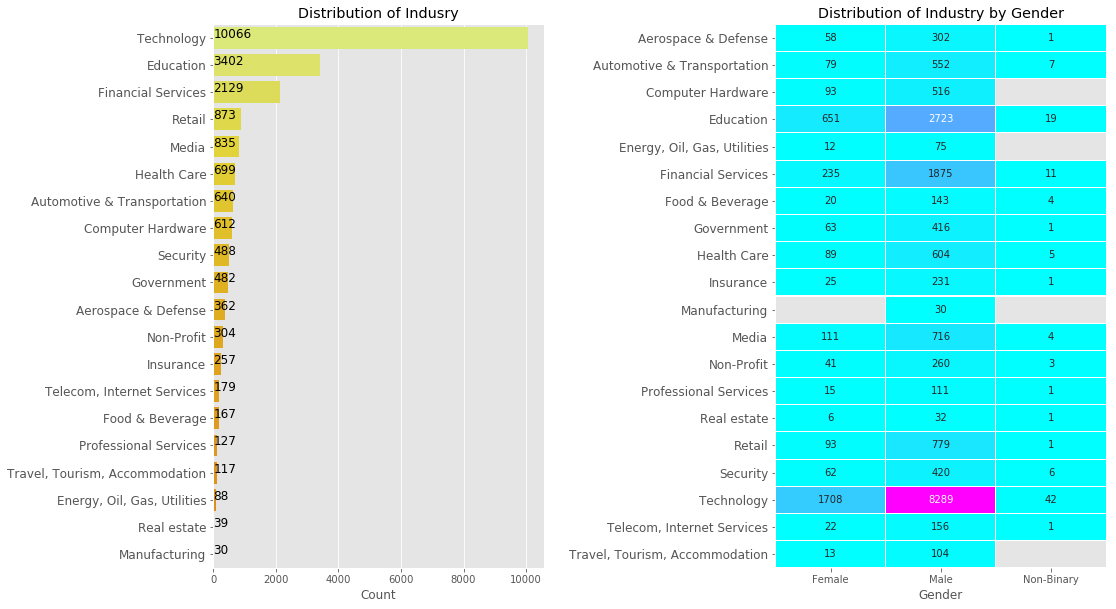

In [55]:
print('Q?:',hacker_qna.loc['q10Industry']['Survey Question'])

f,ax = plt.subplots(1,2,figsize=(16,10))
ind = df['q10Industry'].value_counts()
sns.barplot(ind.values, ind.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Indusry')
ax[0].set_xlabel('Count')
for i, v in enumerate(ind.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)
    
agg = df.groupby(['q10Industry','q3Gender'])['q3Gender'].count().reset_index(name='count')
agg = agg.pivot(columns='q3Gender', values='count', index='q10Industry')
#agg.plot(kind='barh',ax=ax[1],colormap='cool')
sns.heatmap(agg,cmap='cool',annot=True,linewidths=0.01,fmt='.0f',cbar=False, ax=ax[1])
ax[1].set_title('Distribution of Industry by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.7);

We find
* The Technology, Education, Finalcial services is most popular Industry type where both men and women are making working.

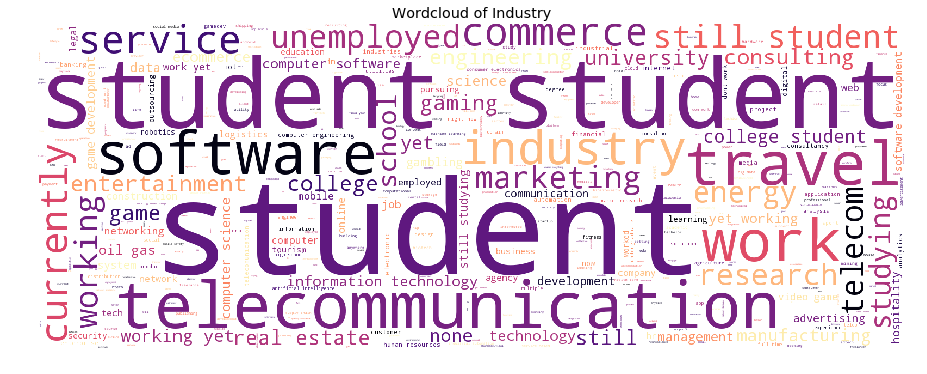

In [56]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='magma',background_color='White'\
              ).generate(' '.join(df['q0010_other'].dropna().str.lower()))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Wordcloud of Industry');

As seen in [Q8: Distribution of Employment Level](#Q8:-Distribution-of-Employment-Level) that higest survey participents are students, so industry type they mentioned students.
* The telecommunication, travel, commerce, service, are top in colud.

## Employe Hiring parameters
### Q12: Employe Expectation from company

In [57]:
columns = df.columns[df.columns.str.startswith('q12')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

interview = pd.DataFrame() 
for c in columns:
    agg = df.groupby([c,'q3Gender'])['q3Gender'].count().reset_index(name='count')
    agg = agg.pivot(columns='q3Gender',index=c, values='count')
    interview = pd.concat([interview,agg])
interview.style.background_gradient(cmap='cool')

Q?: What are the top 3 most important things you look for in a company when looking for job opportunities?(Choose 3)


* The Employe prefer Professional growth and learning, Good work/life balance.

### Word cloud

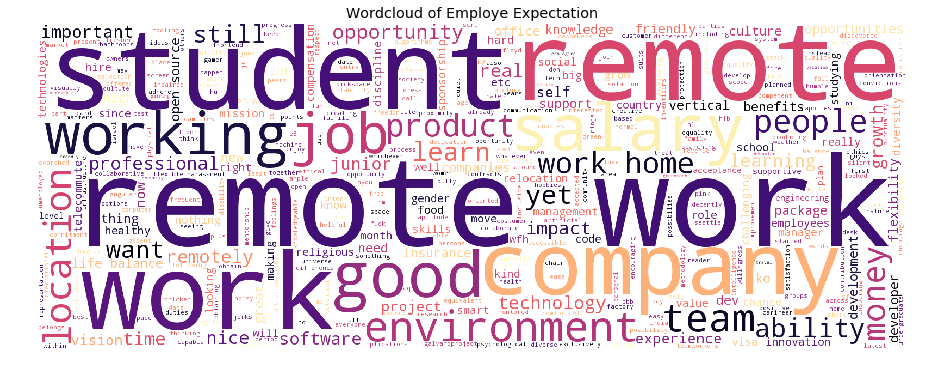

In [58]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='magma',background_color='White'\
              ).generate(' '.join(df['q0012_other'].dropna().str.lower()))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Wordcloud of Employe Expectation');

* The employe expect remote work, good environment, salary.. 

### Q13: Employer Skill measure technique

Q?: Based on your last job hunting experience, how did employers measure your skills?Check all that apply


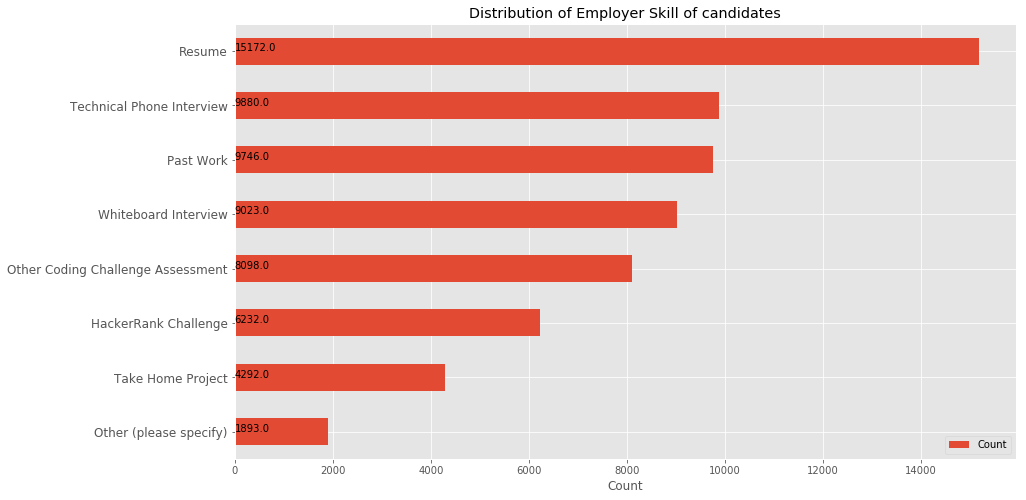

In [59]:
columns = df.columns[df.columns.str.startswith('q13')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

f,ax= plt.subplots(figsize=(14,8))
skill = pd.DataFrame()
for c in columns:
    value = df[c].value_counts()
    skill = pd.concat([skill,value])

skill = skill.rename(columns={0:'Count'})
skill = skill.sort_values(by='Count')
skill.plot(kind='barh',ax=ax)
ax.set_xlabel('Count')
ax.set_title('Distribution of Employer Skill of candidates')
for i,v in enumerate(skill.values):
    ax.text(0.8,i,v[0], fontsize=10,color='k')

* The resume is most impactful on employers in selection process.
* Technical Phone Interview,Past Work is most favorable choice is selection process.

Let's look at other selection method by using wordcloud

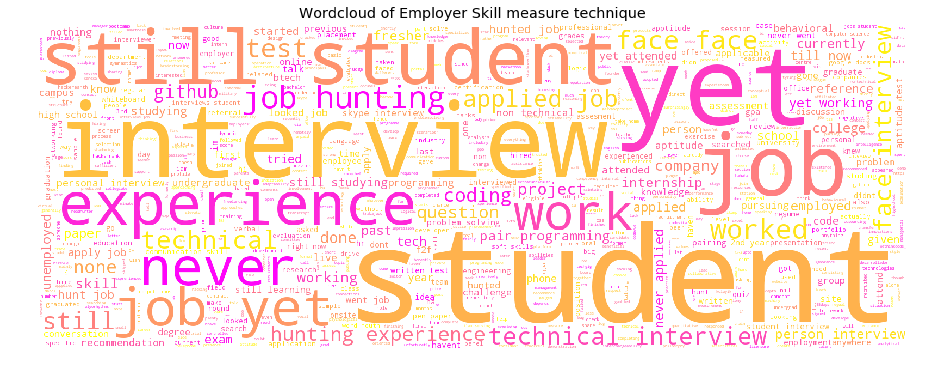

In [60]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='spring',background_color='White'\
              ).generate(' '.join(df['q0013_other'].dropna().str.lower()))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Wordcloud of Employer Skill measure technique');

* technical interview, face to face interview, github are important screenig method

### Q13: Distribution fo Ability

Q?: Did you feel these were a good reflection of your abilities?


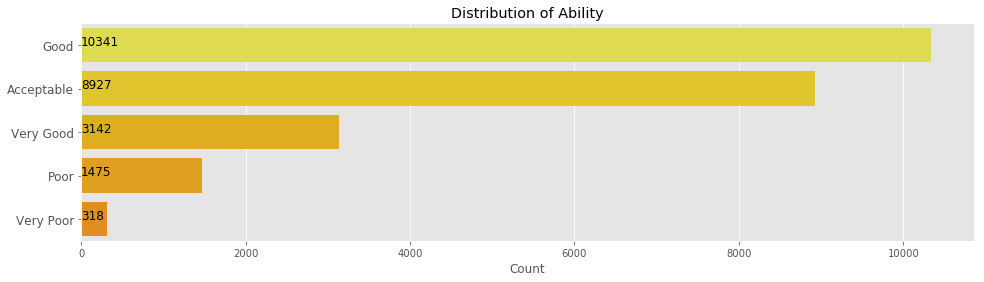

In [61]:
print('Q?:',hacker_qna.loc['q14GoodReflecAbilities']['Survey Question'])

f,ax = plt.subplots(figsize=(16,4))
ind = df['q14GoodReflecAbilities'].value_counts()
sns.barplot(ind.values, ind.index, palette='Wistia',ax=ax)
ax.set_title('Distribution of Ability')
ax.set_xlabel('Count')
for i, v in enumerate(ind.values):
    ax.text(0.8,i,v,color='k',fontsize=12)

### Q15: Level 2 to Level 3 Unlocking Question

Q?: You completed Level 2 of 4! To unlock the next level, solve this quick challenge and answer one quick question below.What does this function do?# n is an integer     def function(n):           for i in range(n):                  print "Hello, World!"


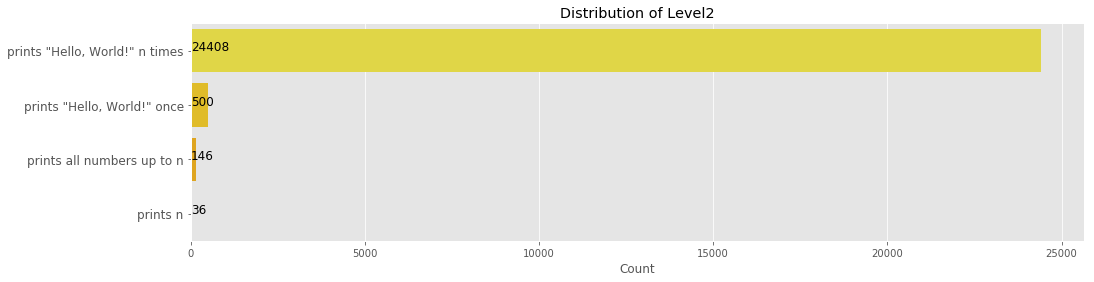

In [62]:
print('Q?:',hacker_qna.loc['q15Level2']['Survey Question'])

f,ax = plt.subplots(figsize=(16,4))
l2 = df['q15Level2'].value_counts()
sns.barplot(l2.values, l2.index, palette='Wistia',ax=ax)
ax.set_title('Distribution of Level2')
ax.set_xlabel('Count')
for i, v in enumerate(l2.values):
    ax.text(0.8,i,v,color='k',fontsize=12)
    

### Q16: Are you Hiring Manger?

Q?: Do you interview people as part of your company's hiring process?


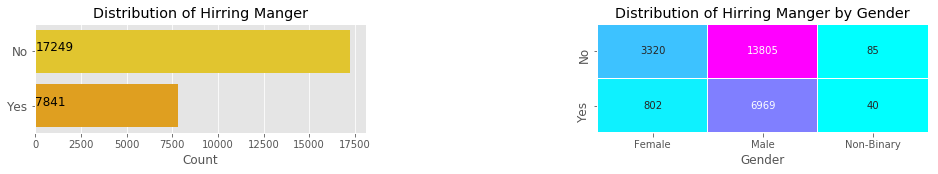

In [63]:
print('Q?:',hacker_qna.loc['q16HiringManager']['Survey Question'])

f,ax = plt.subplots(1,2,figsize=(16,2))
hm = df['q16HiringManager'].value_counts()
sns.barplot(hm.values, hm.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Hirring Manger')
ax[0].set_xlabel('Count')

for i, v in enumerate(hm.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)
    
agg = df.groupby(['q16HiringManager','q3Gender'])['q3Gender'].count().reset_index(name='count')
agg = agg.pivot(columns='q3Gender', values='count', index='q16HiringManager')
#agg.plot(kind='barh',ax=ax[1],colormap='cool')
sns.heatmap(agg,cmap='cool',annot=True,linewidths=0.01,fmt='.0f',cbar=False, ax=ax[1])
ax[1].set_title('Distribution of Hirring Manger by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.7);

* There are 7k hiring mangers in the survey out of that 802 female manger

### Q17: Challenges of hiring technical talent

Q?: What are some of the biggest challenges you face when hiring technical talent?Check all that apply.


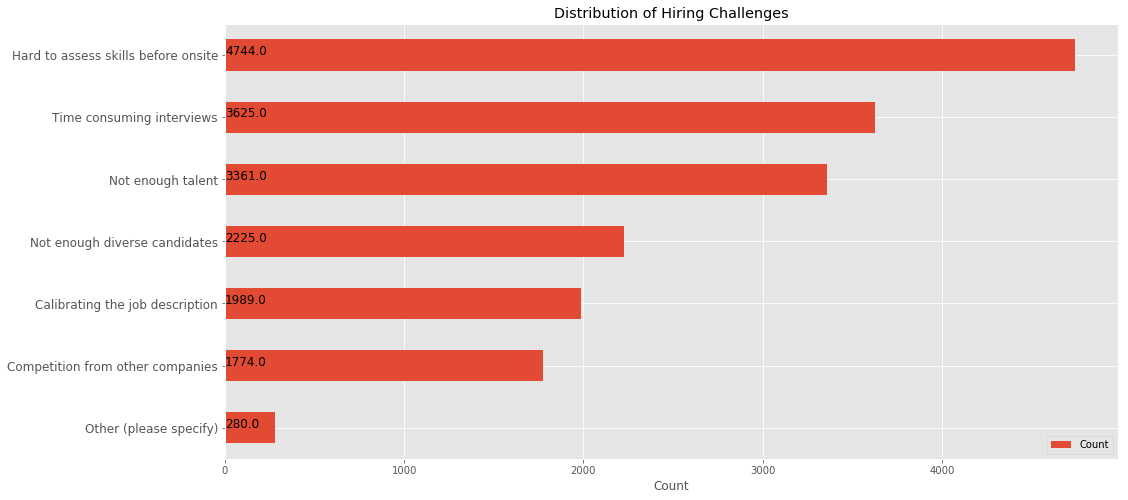

In [64]:
columns = df.columns[df.columns.str.startswith('q17')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

f,ax= plt.subplots(figsize=(16,8))
skill = pd.DataFrame()
for c in columns:
    value = df[c].value_counts()
    skill = pd.concat([skill,value])

skill = skill.rename(columns={0:'Count'})
skill = skill.sort_values(by='Count')
skill.plot(kind='barh',ax=ax)
ax.set_xlabel('Count')
ax.set_title('Distribution of Hiring Challenges')
for i,v in enumerate(skill.values):
    ax.text(0.8,i,v[0], fontsize=12,color='k')

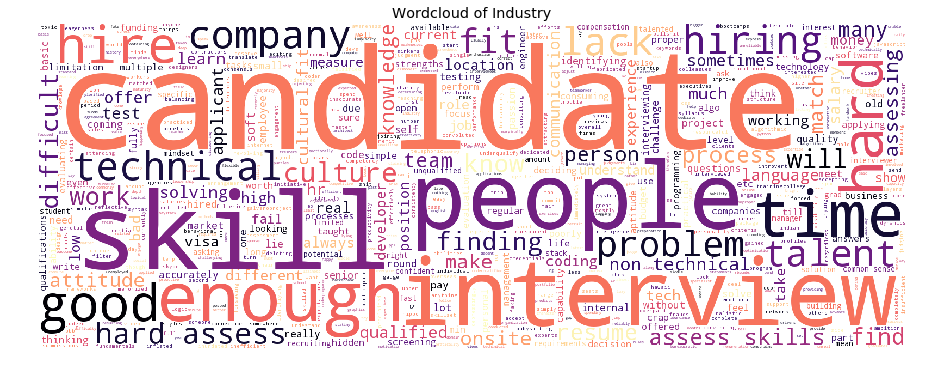

In [65]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='magma',background_color='White'\
              ).generate(' '.join(df['q0017_other'].dropna().str.lower()))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Wordcloud of Industry');

### Q18: Deleloper hiring target for coming year

Q?: How many developers are you hiring over the next year?


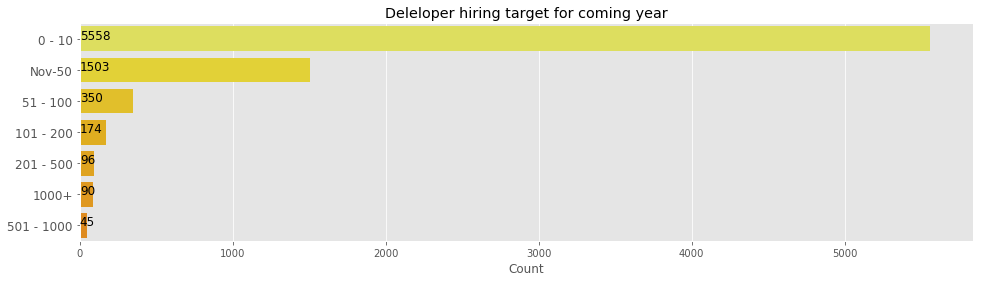

In [66]:
print('Q?:',hacker_qna.loc['q18NumDevelopHireWithinNextYear']['Survey Question'])

f,ax = plt.subplots(figsize=(16,4))
plan = df['q18NumDevelopHireWithinNextYear'].value_counts()
sns.barplot(plan.values, plan.index, palette='Wistia',ax=ax)
ax.set_title('Deleloper hiring target for coming year')
ax.set_xlabel('Count')
for i, v in enumerate(plan.values):
    ax.text(0.8,i,v,color='k',fontsize=12)

The hiring manger plan to hire is more 0-10 developer in 2018 for the company

### Q19: Talent assessment tools

Q?: Which talent assessment tools are you using in your recruiting process at the first step of the interview process? Check all that apply.


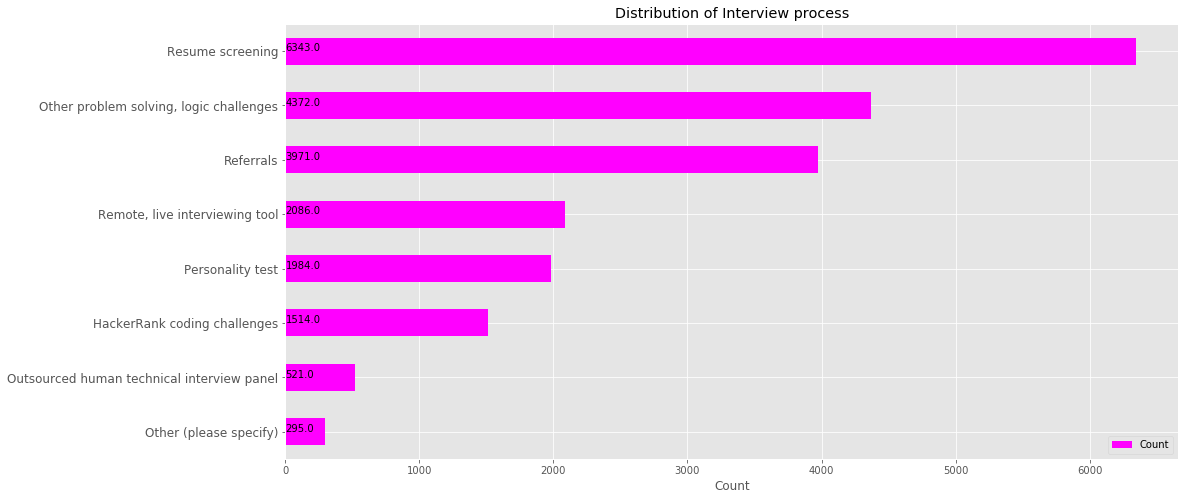

In [67]:
columns = df.columns[df.columns.str.startswith('q19')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

f,ax= plt.subplots(figsize=(16,8))
tool = pd.DataFrame()
for c in columns:
    value = df[c].value_counts()
    tool = pd.concat([tool,value])

tool = tool.rename(columns={0:'Count'})
tool = tool.sort_values(by='Count')
tool.plot(kind='barh',ax=ax,colormap='spring')
ax.set_xlabel('Count')
ax.set_title('Distribution of Interview process')
for i,v in enumerate(tool.Count):
    ax.text(0.8,i,v, fontsize=10,color='k')

* The resume screening is first and popular method in selection process
* The logic chalenge, solving problems are important step in selection process

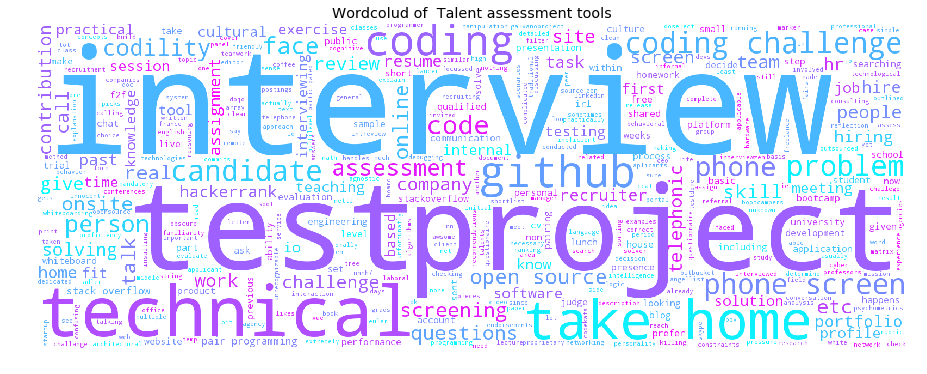

In [68]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='cool',background_color='White'\
              ).generate(' '.join(df['q0019_other'].dropna().str.lower()))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Wordcolud of  Talent assessment tools');

### Q20: Top 3 Qualification

Q?: What are the top 3 most important qualifications you look for in an engineering candidate before the onsite? Check up to 3.


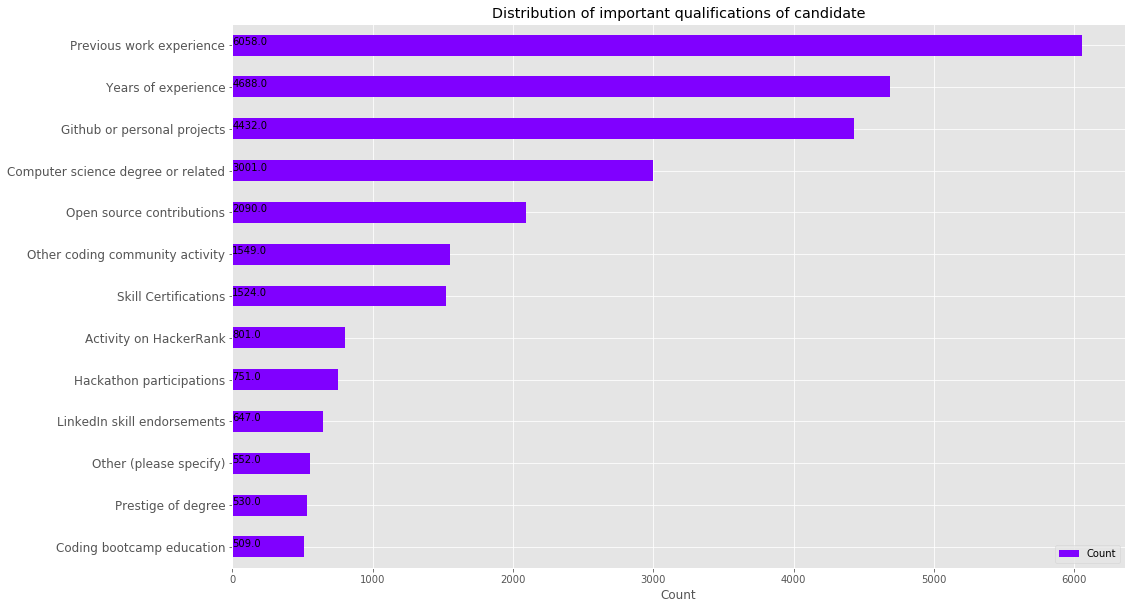

In [69]:
columns = df.columns[df.columns.str.startswith('q20')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

f,ax= plt.subplots(figsize=(16,10))
skill = pd.DataFrame()
for c in columns:
    value = df[c].value_counts()
    skill = pd.concat([skill,value])

skill = skill.rename(columns={0:'Count'})
skill = skill.sort_values(by='Count')
skill.plot(kind='barh',ax=ax,colormap='rainbow')
ax.set_xlabel('Count')
ax.set_title('Distribution of important qualifications of candidate')

for i,v in enumerate(skill.Count):
    ax.text(0.8,i,v, fontsize=10,color='k')

* Previous work experience and Year of experience is top screening method
* Github or personal project plays an edge over candidate.

### Q21: Core competencies for developer

Q?: Which of these core competencies do you look for in software developer candidates? Check all that apply.


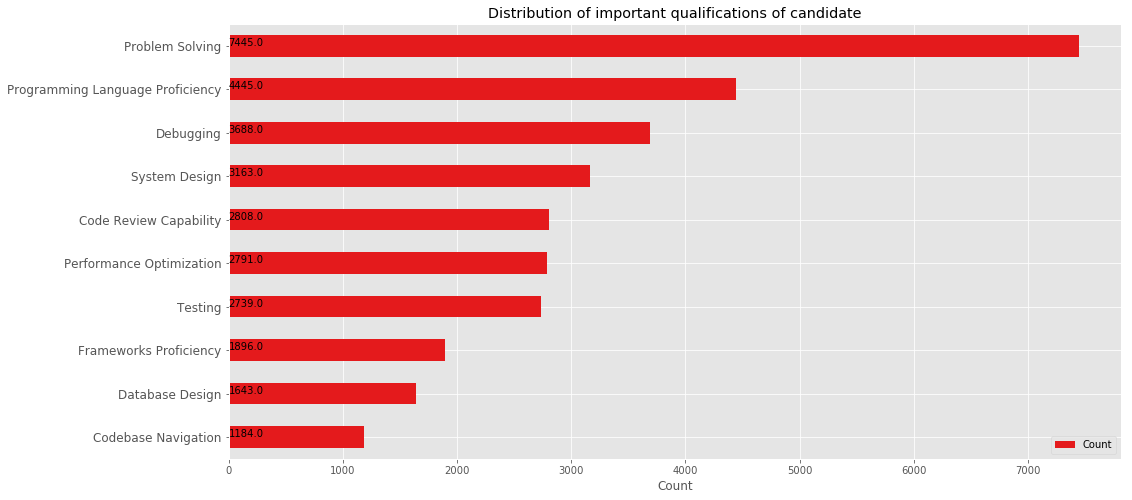

In [70]:
columns = df.columns[df.columns.str.startswith('q21')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

f,ax= plt.subplots(figsize=(16,8))
skill = pd.DataFrame()
for c in columns:
    value = df[c].value_counts()
    skill = pd.concat([skill,value])

skill = skill.rename(columns={0:'Count'})
skill = skill.sort_values(by='Count')
skill.plot(kind='barh',ax=ax,colormap='Set1')
ax.set_xlabel('Count')
ax.set_title('Distribution of important qualifications of candidate')

for i,v in enumerate(skill.Count):
    ax.text(0.8,i,v, fontsize=10,color='k')

* The problem solving is the most important skill for sofware developer

### Q22: Popular language

Q?: Which of these core competencies do you look for in software developer candidates? Check all that apply.


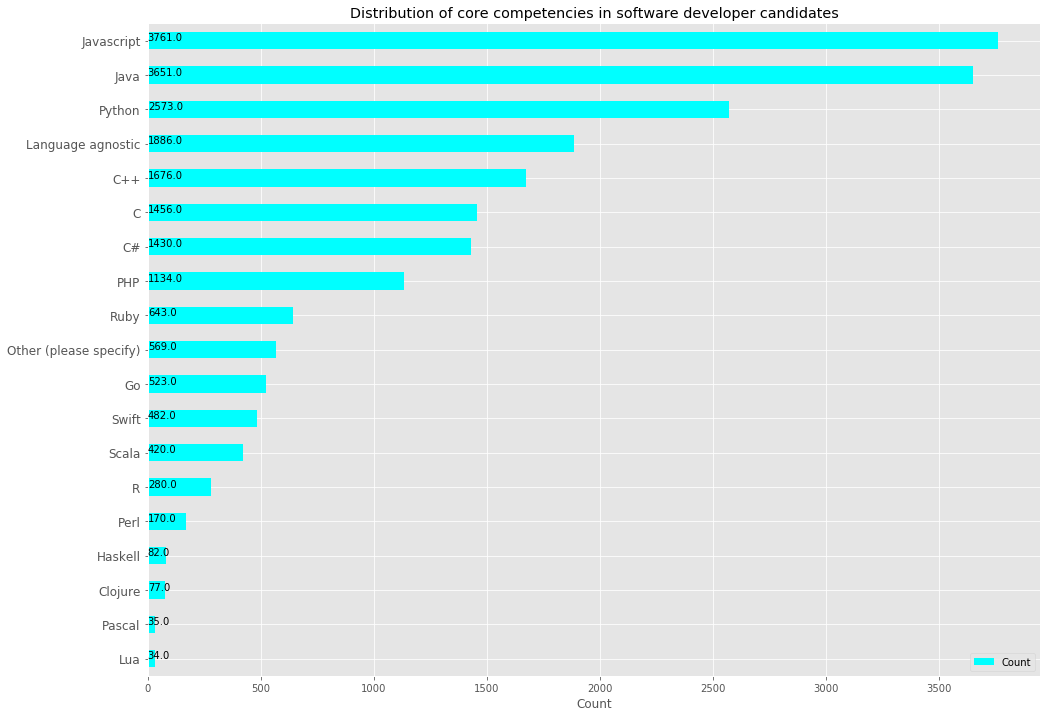

In [71]:
columns = df.columns[df.columns.str.startswith('q22')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

f,ax= plt.subplots(figsize=(16,12))
skill = pd.DataFrame()
for c in columns:
    value = df[c].value_counts()
    skill = pd.concat([skill,value])

skill = skill.rename(columns={0:'Count'})
skill = skill.sort_values(by='Count')
skill.plot(kind='barh',ax=ax,colormap='cool')
ax.set_xlabel('Count')
ax.set_title('Distribution of core competencies in software developer candidates')

for i,v in enumerate(skill.Count):
    ax.text(0.8,i,v, fontsize=10,color='k')

* Java script, Java, python are top prefered language by hanker rank

### Word cloud (Other programming language)

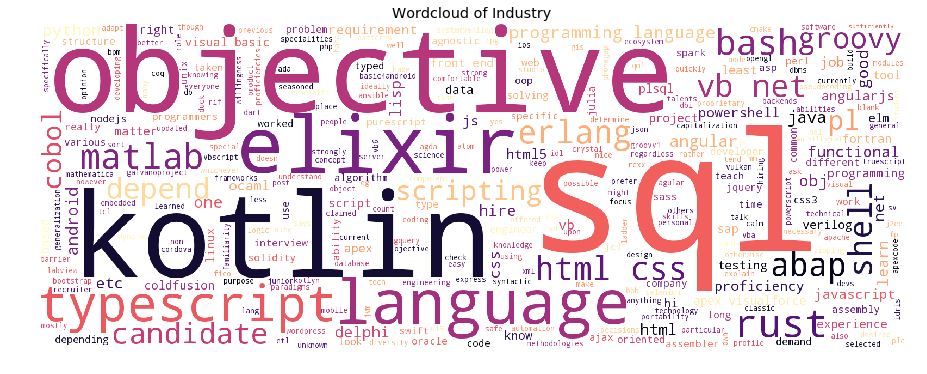

In [72]:
# other than above type mentioned

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='magma',background_color='White'\
              ).generate(' '.join(df['q0022_other'].dropna().str.lower()))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Wordcloud of Industry');

* The SQL, Kotalin(Kotlin is a statically-typed programming language that runs on the Java virtual machine) are top in the cloud.

### Q23: Popular Frame work

Q?: Which frameworks do you look for?


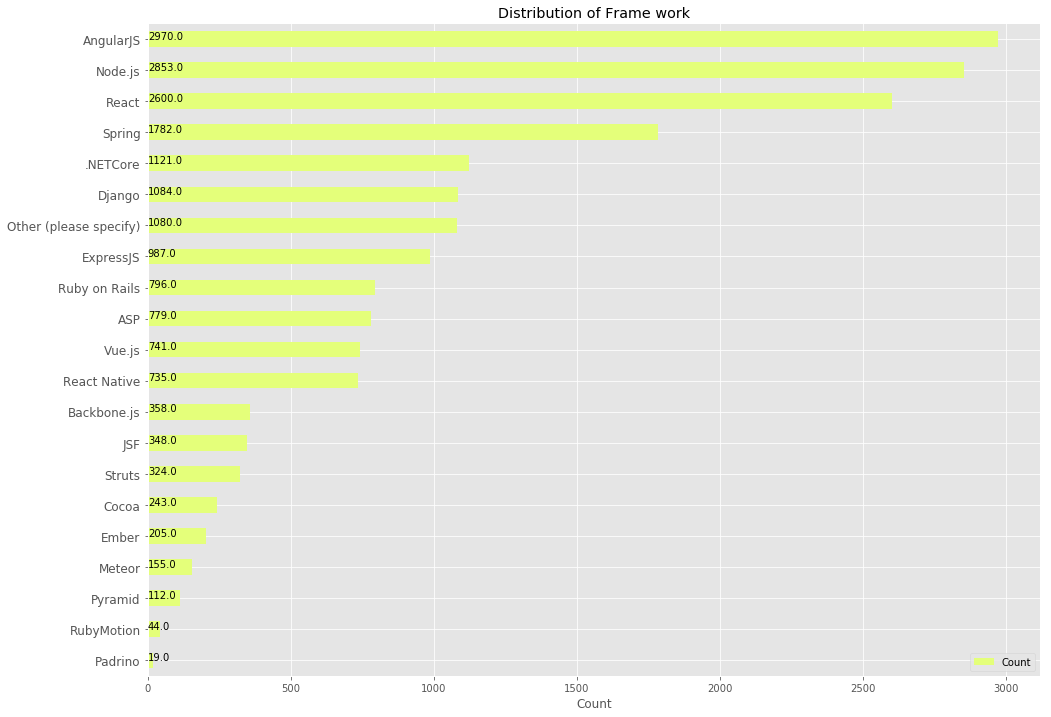

In [73]:
columns = df.columns[df.columns.str.startswith('q23')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

f,ax= plt.subplots(figsize=(16,12))
skill = pd.DataFrame()
for c in columns:
    value = df[c].value_counts()
    skill = pd.concat([skill,value])

skill = skill.rename(columns={0:'Count'})
skill = skill.sort_values(by='Count')
skill.plot(kind='barh',ax=ax,colormap='Wistia')
ax.set_xlabel('Count')
ax.set_title('Distribution of Frame work')

for i,v in enumerate(skill.Count):
    ax.text(0.8,i,v, fontsize=10,color='k')

### Q24: Text editor Vim or Emacs 

Q?: Vim or Emacs?


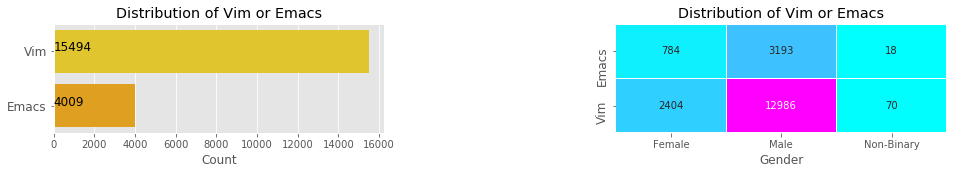

In [74]:
print('Q?:',hacker_qna.loc['q24VimorEmacs']['Survey Question'])

f,ax = plt.subplots(1,2,figsize=(16,2))
hm = df['q24VimorEmacs'].value_counts()
sns.barplot(hm.values, hm.index, palette='Wistia',ax=ax[0])
ax[0].set_title('Distribution of Vim or Emacs')
ax[0].set_xlabel('Count')
for i, v in enumerate(hm.values):
    ax[0].text(0.8,i,v,color='k',fontsize=12)
    
agg = df.groupby(['q24VimorEmacs','q3Gender'])['q3Gender'].count().reset_index(name='count')
agg = agg.pivot(columns='q3Gender', values='count', index='q24VimorEmacs')
#agg.plot(kind='barh',ax=ax[1],colormap='cool')
sns.heatmap(agg,cmap='cool',annot=True,linewidths=0.01,fmt='.0f',cbar=False, ax=ax[1])
ax[1].set_title('Distribution of Vim or Emacs')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.7);

### Q25: Programming language known or willing to know

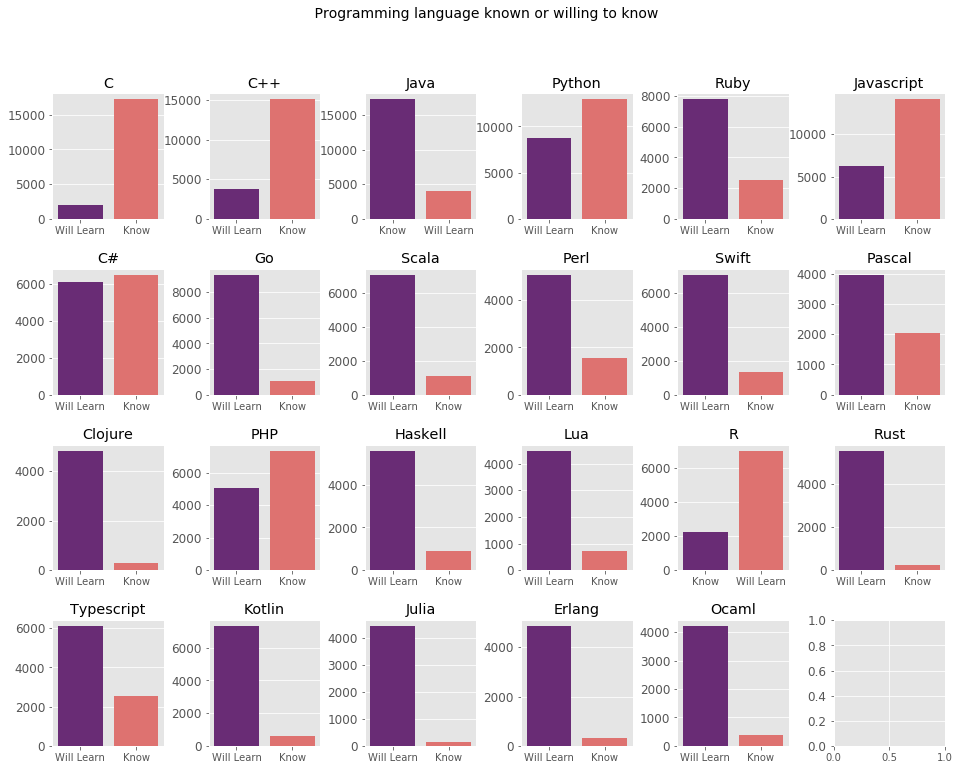

In [75]:
columns = df.columns[df.columns.str.startswith('q25')]
#print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])
length = len(columns)
#print(length)
columns = columns.drop('q25LangOther')
f,ax= plt.subplots(4,6,figsize=(16,12))
axs = ax.ravel()
for i,c in enumerate(columns):
    sns.countplot(df[c],ax=axs[i],palette='magma')
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].set_title(hacker_qna.loc[c]['Survey Question'])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.suptitle(' Programming language known or willing to know',fontsize=14);

### Q25: Frame work known or willing to know

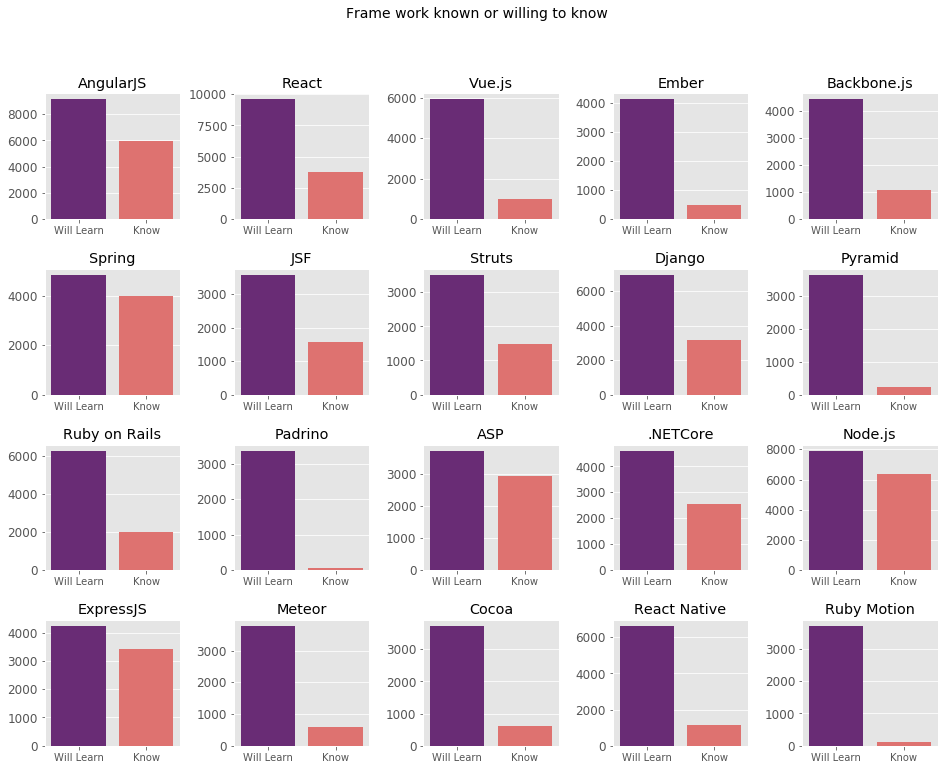

In [76]:
columns = df.columns[df.columns.str.startswith('q26')]
#print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])
length = len(columns)
#print(length)

f,ax= plt.subplots(4,5,figsize=(16,12))
axs = ax.ravel()
for i,c in enumerate(columns):
    if df[c].nunique()>1: 
        sns.countplot(df[c],ax=axs[i],palette='magma')
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
        axs[i].set_title(hacker_qna.loc[c]['Survey Question'])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.suptitle('Frame work known or willing to know',fontsize=14);

### Q27: Emerging Technology

Q?: Which emerging tech skill are you currently learning or looking to learn in the next year?


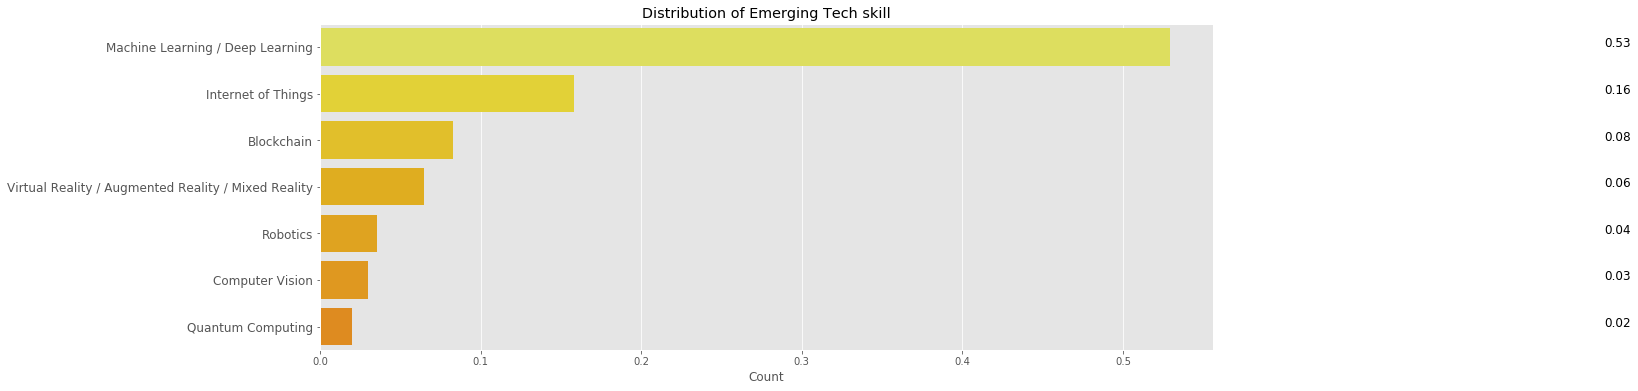

In [113]:
print('Q?:',hacker_qna.loc['q27EmergingTechSkill']['Survey Question'])

f,ax = plt.subplots(figsize=(16,6))
ind = df['q27EmergingTechSkill'].value_counts()/df.shape[0]
sns.barplot(x = ind.values, y = ind.index, palette='Wistia',ax=ax)
ax.set_title('Distribution of Emerging Tech skill')
ax.set_xlabel('Count')
for i, v in enumerate(ind.values):
    ax.text(0.8,i,round(v,2),color='k',fontsize=12)

### Q28: Love or Hate programming language

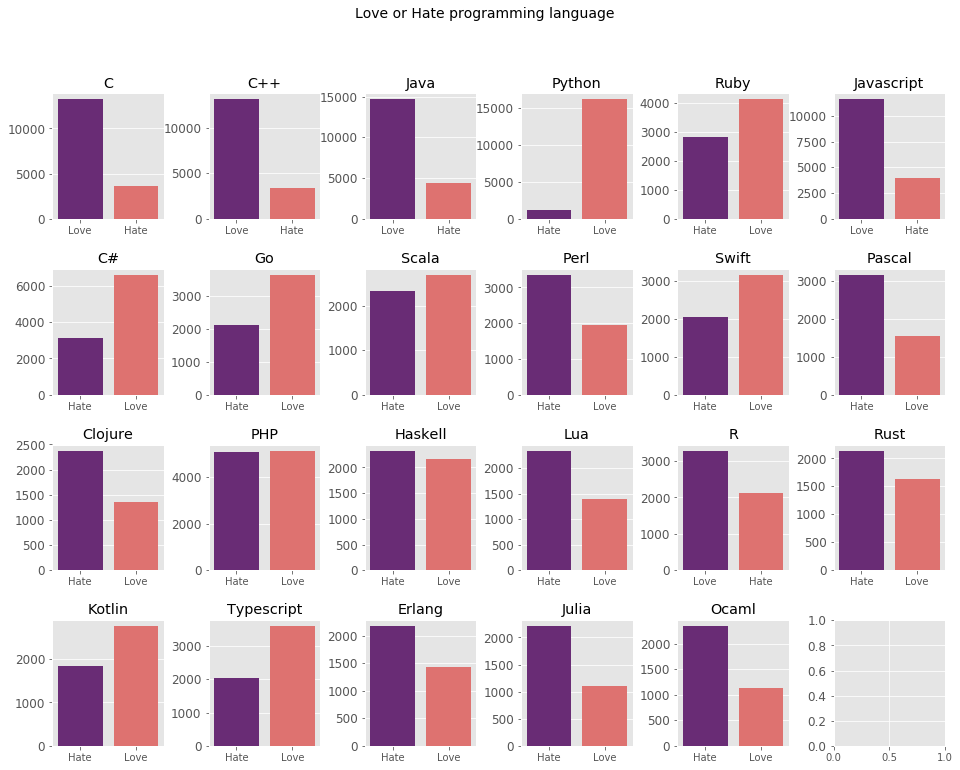

In [78]:
columns = df.columns[df.columns.str.startswith('q28')]
#print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])
length = len(columns)
#print(length)
columns = columns.drop('q28LoveOther')
f,ax= plt.subplots(4,6,figsize=(16,12))
axs = ax.ravel()
for i,c in enumerate(columns):
    if df[c].nunique()>1: 
        sns.countplot(df[c],ax=axs[i],palette='magma')
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
        axs[i].set_title(hacker_qna.loc[c]['Survey Question'])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.suptitle('Love or Hate programming language',fontsize=14);

### Q29: Love or Hate Frame work

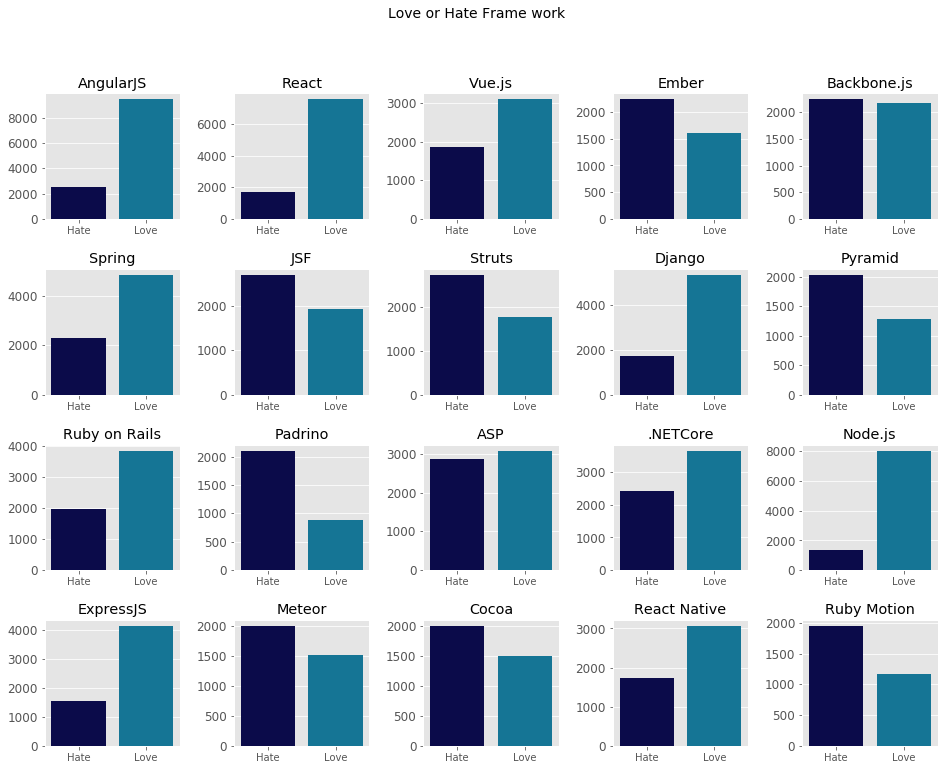

In [95]:
columns = df.columns[df.columns.str.startswith('q29')]
#print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])
length = len(columns)
#print(length)
#columns = columns.drop('q28LoveOther')
f,ax= plt.subplots(4,5,figsize=(16,12))
axs = ax.ravel()
for i,c in enumerate(columns):
    if df[c].nunique()>1: 
        sns.countplot(df[c],ax=axs[i],palette='ocean')
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
        axs[i].set_title(hacker_qna.loc[c]['Survey Question'])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.suptitle('Love or Hate Frame work',fontsize=14);

### Q30: The popular Resources learn and practice

Q?: Besides HackerRank, which other resources do you use to practice and learn coding? Check all that apply.


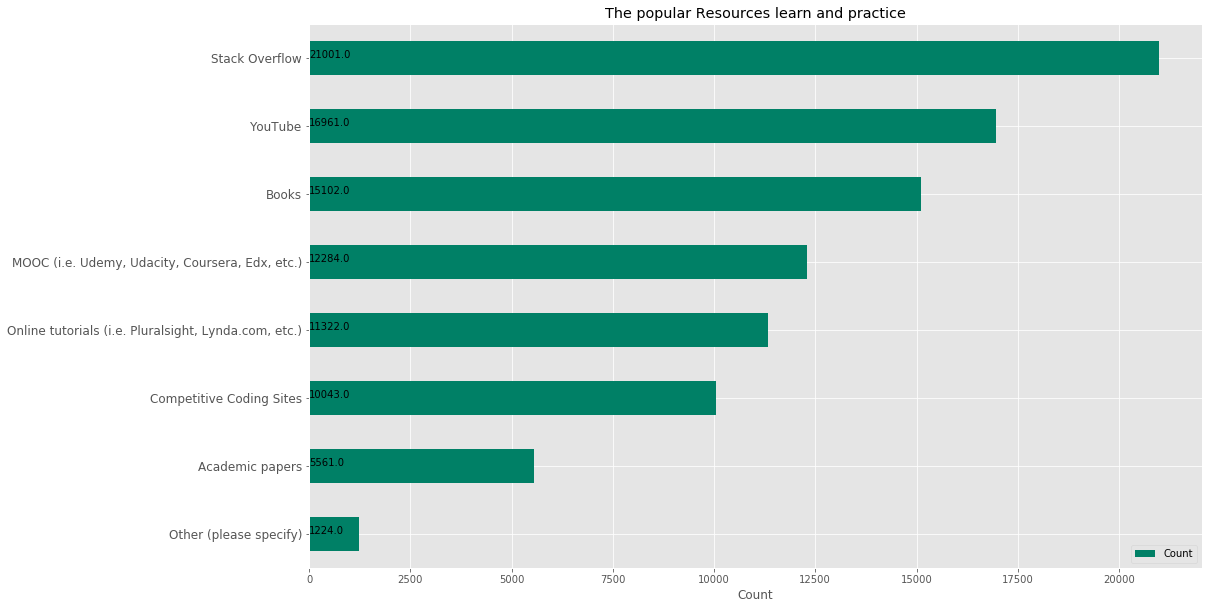

In [80]:
columns = df.columns[df.columns.str.startswith('q30')]
print('Q?:',hacker_qna.loc[columns[0]]['Survey Question'])

f,ax= plt.subplots(figsize=(16,10))
skill = pd.DataFrame()
for c in columns:
    value = df[c].value_counts()
    skill = pd.concat([skill,value])

skill = skill.rename(columns={0:'Count'})
skill = skill.sort_values(by='Count')
skill.plot(kind='barh',ax=ax,colormap='summer')
ax.set_title('The popular Resources learn and practice')
ax.set_xlabel('Count')
for i,v in enumerate(skill.Count):
    ax.text(0.8,i,v, fontsize=10,color='k')

* The stack overflow, You tube are top resource for learning.

### Q31: Level 3 to Level 4 Unlocking Question

Q?: Woo hoo... you completed Level 3 of 4! To unlock Level 4, solve this quick challenge: Which of these mean that 'num' is even?


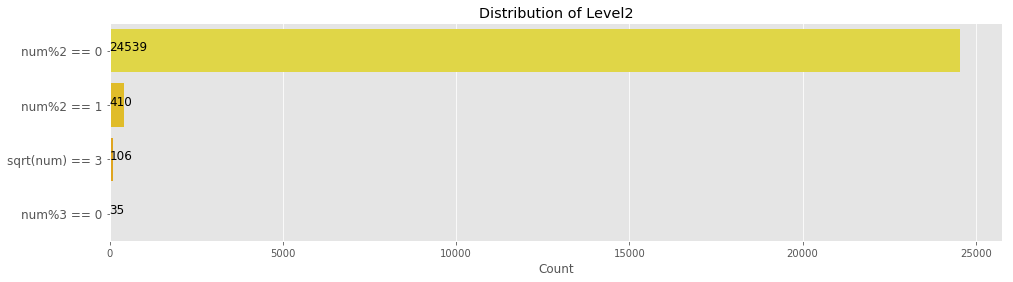

In [81]:
print('Q?:',hacker_qna.loc['q31Level3']['Survey Question'])

f,ax = plt.subplots(figsize=(16,4))
l2 = df['q31Level3'].value_counts()
sns.barplot(l2.values, l2.index, palette='Wistia',ax=ax)
ax.set_title('Distribution of Level2')
ax.set_xlabel('Count')
for i, v in enumerate(l2.values):
    ax.text(0.8,i,v,color='k',fontsize=12)
    

## Hacker Rank feed back
Let's look at the feed back perticular to hacker rank Q32 - Q34

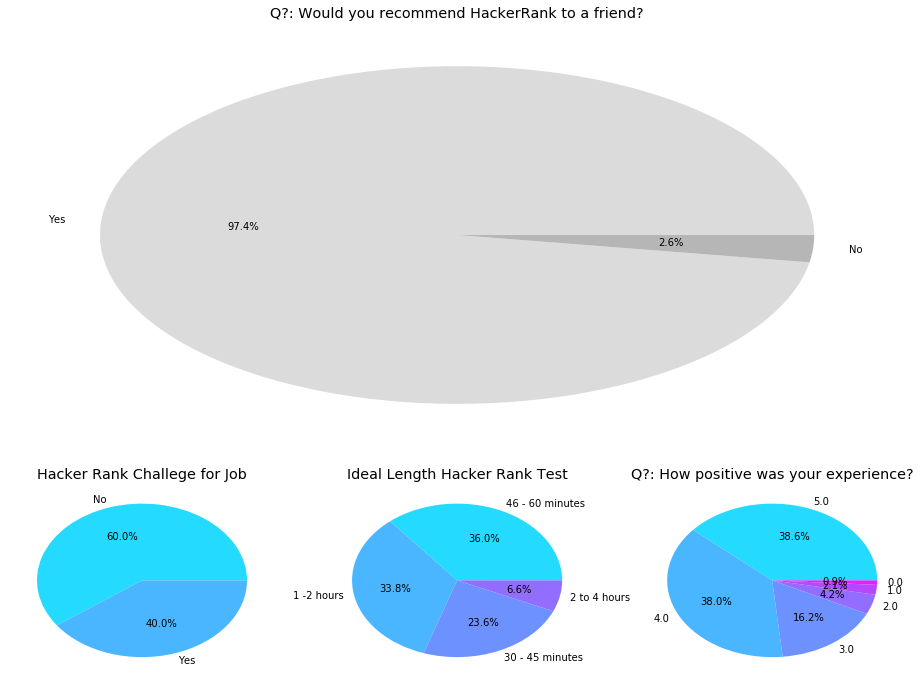

In [82]:
import matplotlib.gridspec as gridspec
f,ax = plt.subplots(figsize=(16,12))
gridspec.GridSpec(3,3)

plt.subplot2grid((3,3),(0,0),colspan=3, rowspan=2)
rec = df['q32RecommendHackerRank'].value_counts()
plt.pie(rec.values,labels=rec.index,autopct='%1.1f%%',colors=sns.color_palette('binary'))
plt.title('Q?: {}'.format(hacker_qna.loc['q32RecommendHackerRank']['Survey Question']))

plt.subplot2grid((3,3),(2,0))
job = df['q33HackerRankChallforJob'].value_counts()
plt.pie(job.values,labels=job.index,autopct='%1.1f%%',colors=sns.color_palette('cool'))
#plt.title('Q?: {}'.format(hacker_qna.loc['q33HackerRankChallforJob']['Survey Question']))
plt.title('Hacker Rank Challege for Job')

plt.subplot2grid((3,3),(2,1))
test = df['q34IdealLengHackerRankTest'].value_counts()
plt.pie(test.values,labels=test.index,autopct='%1.1f%%',colors=sns.color_palette('cool'))
#plt.title('Q?: {}'.format(hacker_qna.loc['q34IdealLengHackerRankTest']['Survey Question']))
plt.title('Ideal Length Hacker Rank Test')

plt.subplot2grid((3,3),(2,2))
test = df['q34PositiveExp'].value_counts()
plt.pie(test.values,labels=test.index,autopct='%1.1f%%',colors=sns.color_palette('cool'))
plt.title('Q?: {}'.format(hacker_qna.loc['q34PositiveExp']['Survey Question']));

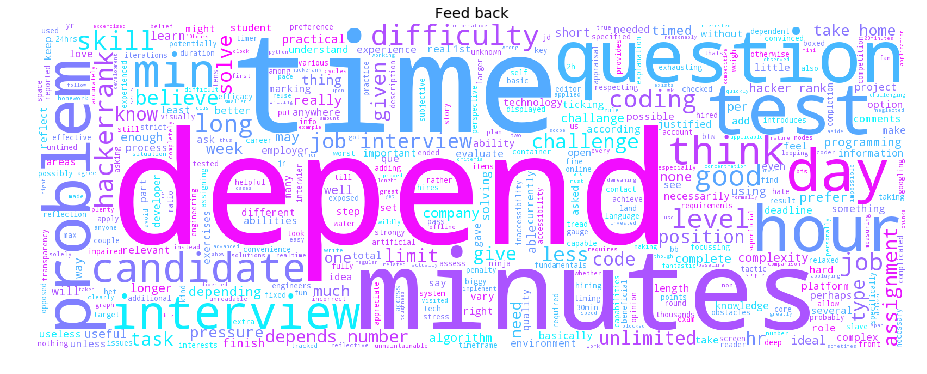

In [83]:
# other than feedback

wc = WordCloud(height=600,width=1600,max_words=1000,stopwords=STOPWORDS,colormap='cool',background_color='White'\
              ).generate(' '.join(df['q0035_other'].dropna().str.lower()))
plt.figure(figsize=(16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Feed back');

## KMeans Clustering

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
seed = 532018

### Level1 Questions cluster

/home/sudhir/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



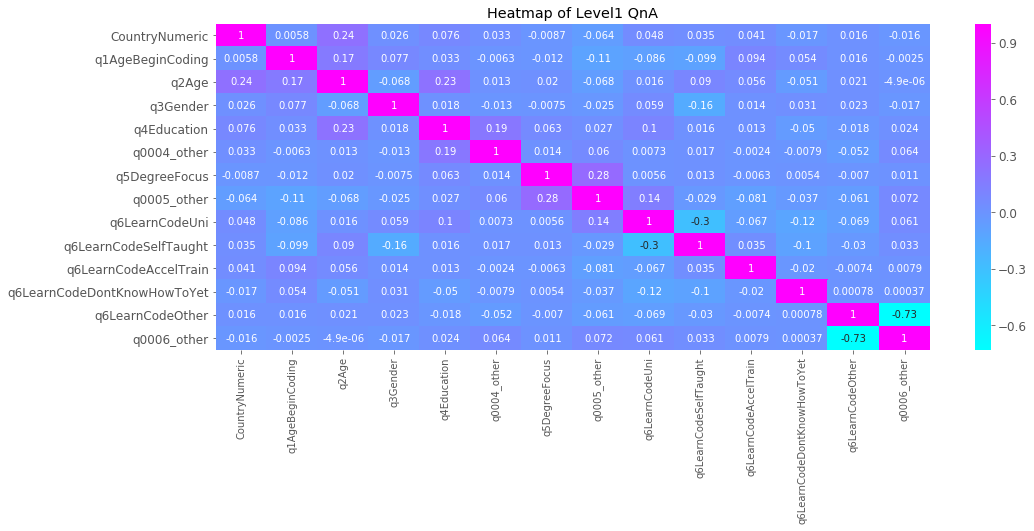

In [85]:
level1_columns = ['CountryNumeric',
       'q1AgeBeginCoding', 'q2Age', 'q3Gender', 'q4Education',
       'q0004_other', 'q5DegreeFocus', 'q0005_other', 'q6LearnCodeUni',
       'q6LearnCodeSelfTaught', 'q6LearnCodeAccelTrain',
       'q6LearnCodeDontKnowHowToYet', 'q6LearnCodeOther', 'q0006_other']
level1 = hacker_numeric[level1_columns]
level1_df = df[level1_columns]

#missing value
#ob_col = level1.select_dtypes(include='object').columns
ob_col = ['q0004_other', 'q0005_other', 'q0006_other']
level1.loc[:,ob_col] = level1.loc[:,ob_col].fillna('entered',axis=0)
level1 = level1.fillna(0,axis=0)

# encoder
le = LabelEncoder()
for c  in ob_col:
    level1[c] = le.fit_transform(level1[c])

# Heatmap
plt.figure(figsize=(16,6))
sns.heatmap(level1.corr(),cmap='cool',annot=True)
plt.title('Heatmap of Level1 QnA')

### Determine value of k using elbow method

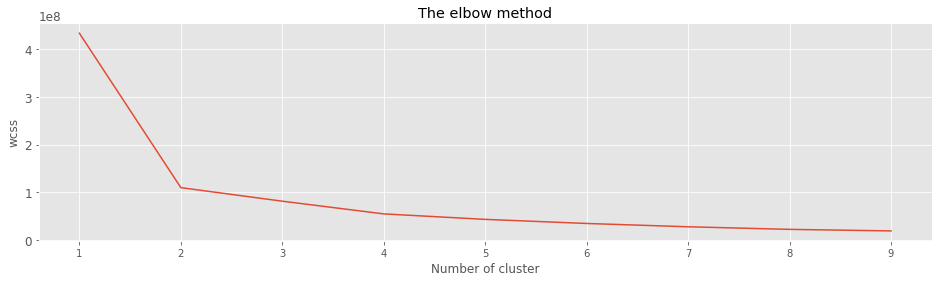

In [86]:
# determine value of k using elbow method
def cluster_elbow(df,n_clusters):
    wcss = []
    for i in range(1,n_clusters):
        cluster = KMeans(n_clusters=i,random_state=seed)
        cluster.fit(df)
        wcss.append(cluster.inertia_) # Sum of square distance P,C
    plt.figure(figsize=(16,4))
    plt.plot(range(1,n_clusters),wcss)
    plt.title('The elbow method')
    plt.xlabel('Number of cluster')
    plt.ylabel('wcss')
    
# Elbow on level1 QnA
cluster_elbow(level1,n_clusters=10)

In [87]:
# Kmeans cluster
cluster = KMeans(n_clusters=4,random_state=seed)
pred = cluster.fit_predict(level1)

### Describe diffirent cluster

In [88]:
# Cluster 1
print('Shape',level1_df[pred==0].shape)
level1_df[pred==0].describe()

Shape (616, 14)


CountryNumeric   q1AgeBeginCoding              q2Age q3Gender  \
count             509                615                614      615   
unique             72                  9                  6        3   
top     United States  16 - 20 years old  25 - 34 years old     Male   
freq              150                226                281      475   

             q4Education q0004_other     q5DegreeFocus  \
count                595          40               173   
unique                 7          38                 2   
top     College graduate    Bachelor  Computer Science   
freq                 271           2               119   

                   q0005_other        q6LearnCodeUni  \
count                      616                   221   
unique                     321                     1   
top     Information Technology  School or university   
freq                        30                   221   

                   q6LearnCodeSelfTaught  \
count                                474   
unique                                 1   
top     Self-taught (i.e. books, online)   
freq                                 474   

                       q6LearnCodeAccelTrain   q6LearnCodeDontKnowHowToYet  \
count                                     96                            20   
unique                                     1                             1   
top     Accelerated training (i.e. bootcamp)  I don't know how to code yet   
freq                                      96                            20   

              q6LearnCodeOther  \
count                       37   
unique                       1   
top     Other (please specify)   
freq                        37   

                                              q0006_other  
count                                                  37  
unique                                                 37  
top     Self-taught, save for a certificate course in ...  
freq                                                    1

* In cluster 1 top listed country is United State, they are college graguate . 

In [89]:
# Cluster 2
print('Shape',level1_df[pred==1].shape)
level1_df[pred==1].describe()

Shape (16134, 14)


CountryNumeric   q1AgeBeginCoding              q2Age q3Gender  \
count           13425              16115              16106    16081   
unique             89                  9                  9        3   
top             Ghana  16 - 20 years old  18 - 24 years old     Male   
freq             4252               9984               9386    13461   

             q4Education q0004_other     q5DegreeFocus           q0005_other  \
count              15923         287             15895                   193   
unique                 7         235                 2                   155   
top     College graduate    Bachelor  Computer Science  Software Engineering   
freq                8074           9             12387                    10   

              q6LearnCodeUni             q6LearnCodeSelfTaught  \
count                  11078                             11090   
unique                     1                                 1   
top     School or university  Self-taught (i.e. books, online)   
freq                   11078                             11090   

                       q6LearnCodeAccelTrain   q6LearnCodeDontKnowHowToYet  \
count                                   1037                           229   
unique                                     1                             1   
top     Accelerated training (i.e. bootcamp)  I don't know how to code yet   
freq                                    1037                           229   

              q6LearnCodeOther q0006_other  
count                      264         264  
unique                       1         224  
top     Other (please specify)        work  
freq                       264          10

* In cluster 2 top listed country is Ghana, they are software engineer, college graguate. 

In [90]:
# Cluster 3
print('Shape',level1_df[pred==3].shape)
level1_df[pred==2].describe()

Shape (7598, 14)


CountryNumeric   q1AgeBeginCoding              q2Age q3Gender  \
count             632                743                744      742   
unique             68                  9                  7        3   
top     United States  16 - 20 years old  25 - 34 years old     Male   
freq              180                300                317      588   

             q4Education q0004_other  \
count                723          33   
unique                 7          32   
top     College graduate         MBA   
freq                 406           2   

                                            q5DegreeFocus q0005_other  \
count                                                 301         745   
unique                                                  2         364   
top     Other STEM (science, technology, engineering, ...   Economics   
freq                                                  192          58   

              q6LearnCodeUni             q6LearnCodeSelfTaught  \
count                    304                               565   
unique                     1                                 1   
top     School or university  Self-taught (i.e. books, online)   
freq                     304                               565   

                       q6LearnCodeAccelTrain   q6LearnCodeDontKnowHowToYet  \
count                                    125                            26   
unique                                     1                             1   
top     Accelerated training (i.e. bootcamp)  I don't know how to code yet   
freq                                     125                            26   

              q6LearnCodeOther q0006_other  
count                       42          42  
unique                       1          42  
top     Other (please specify)     Friends  
freq                        42           1

* In cluster 3 top listed country is United State, they are college graguate, degre focus is other STEM. 

In [91]:
# Cluster 4
print('Shape',level1_df[pred==3].shape)
level1_df[pred==3].describe()

Shape (7598, 14)


CountryNumeric   q1AgeBeginCoding              q2Age q3Gender  \
count            7598               7587               7585     7583   
unique             51                  9                  9        3   
top     United States  16 - 20 years old  25 - 34 years old     Male   
freq             2856               3783               3247     6250   

             q4Education q0004_other     q5DegreeFocus           q0005_other  \
count               7544         100              7400                   158   
unique                 7          86                 2                   109   
top     College graduate    Bachelor  Computer Science  Software Engineering   
freq                3259           7              5357                    10   

              q6LearnCodeUni             q6LearnCodeSelfTaught  \
count                   5829                              5471   
unique                     1                                 1   
top     School or university  Self-taught (i.e. books, online)   
freq                    5829                              5471   

                       q6LearnCodeAccelTrain   q6LearnCodeDontKnowHowToYet  \
count                                    574                            68   
unique                                     1                             1   
top     Accelerated training (i.e. bootcamp)  I don't know how to code yet   
freq                                     574                            68   

              q6LearnCodeOther q0006_other  
count                      146         146  
unique                       1         113  
top     Other (please specify)        Work  
freq                       146          10

* In cluster 4 top listed country is United State, they are college graguate. 

we can dig deeper into each cluster 

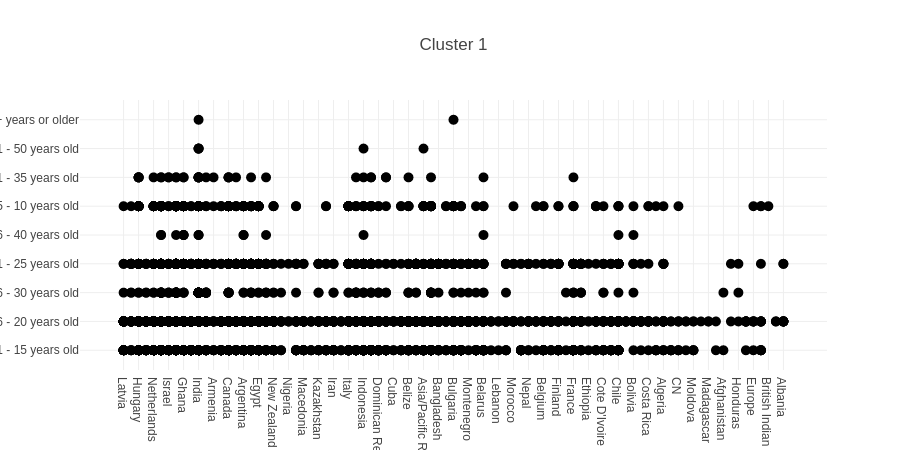

In [92]:
data = [ go.Scatter(x = level1_df[pred==1]['CountryNumeric'],
                   y = level1_df[pred==1]['q1AgeBeginCoding'],
                    mode='markers',
                    marker = dict(
                        size=10,
                        color = level1_df[pred==1]['q3Gender']
                        
                    ),
                   )]
layout = dict(title='Cluster 1')
fig = dict(data=data,layout=layout)
py.iplot(fig)

## Summary

* The top response give by African country Ghana,India,US
* The top female response is in Ghana followed India
* There are 20k male, 4k feamle are responded to hacker rank survey.
* The most of people stared coding in age 16-20 years followed by 11-15 year.
* The highest level of education is College graduate followed by Master, phd.
* The most popular place where learnt coding is University or school and Self taught
* The accelerate coding or bootcamp is not popular choice for learn to code


* Female prefer school or university than self taught but male prefer other way more, This key reason for less participation of hacker survey. Female Haker Ranker prefer their professors than online learing,self taught.  
* Female Level1 developer is more than senior developer,but for male it other way, may be promotion for female is limit.


### Thank you, please upvote -:)